## Basics

In [1]:
def get_results_for_p(p,all_results):
    # Create the key as a tuple
    #key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.k_entry,p.k_f,p.prod_alpha,p.dt)
    key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.prod_alpha,p.dt,p.u_bf_m)
    # Check if the key exists in the saved results
    if key in all_results:
        print(key)
        return all_results[key]
    else:
        print(f"No results found for p = {key}")
        return None

from primitives import Parameters
p = Parameters()
import pickle
import matplotlib.pyplot as plt
import numpy as np
from plots import Plots
import cProfile
import pstats

plts=Plots(p)
cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc,mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n1,mwc_s_J,mwc_s_W,mwc_s_Wstar,mwc_s_sep,mwc_sd_J,mwc_sd_W,mwc_sd_Wstar,mwc_sd_sep=None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

In [2]:
# Load the temp objects
try:
    with open('my_objects.pkl', 'rb') as file:
        objects = pickle.load(file)
except FileNotFoundError:
    # If the file doesn't exist, start with an empty dictionary
    objects = {}

# Load the permanent results, for sep, across different parametrizations
with open("results_Rho_sep.pkl", "rb") as file:
    all_results = pickle.load(file)
results = get_results_for_p(p,all_results)

No results found for p = (3, 200, 5, 4, 1, 1.0, 1.0, 5.0, 0.5, 0.25, 1.0)


In [3]:
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc)=cc.J(1)

So the shapes are the same, it's just the domains that are quite different...
Is that the issue? That the value the worker earns at the current firm and the set of admissible promised value from OJS are v different?
Gotta dig deeper into how the search function is approximated methinks

Update 24/10/24: My intuition now is that it's indeed the v_0/sign-on wage that are the issue. Basic v_0 is both way too large and weird economically.
However, setting v_0=U has so far been problematic, somehow v_0 eclipses the entire v_grid, even the very top, so that the sign-on wage is positive.

Making the v_grid custom, aka the same as the W... didn't help at all, and also just doesn't seem like a good idea. As long as the v_0 is ok, using v_grid should be fine

In [4]:
from Multiworker_Contract_GE import MultiworkerContract
mwc_GE=MultiworkerContract(p)

J shape (3, 5, 5, 200, 1)
W shape (3, 5, 5, 200, 1, 2)
Slow kappa method
kappa 40.0
signon [0.         0.00981266 0.01969233 0.02963945 0.03965449 0.04973792
 0.05989019 0.07011178 0.08040317 0.09076482 0.10119722 0.11170086
 0.12227621 0.13292377 0.14364404 0.1544375  0.16530465 0.17624601
 0.18726208 0.19835336 0.20952037 0.22076364 0.23208367 0.24348099
 0.25495613 0.26650963 0.27814201 0.28985382 0.30164559 0.31351788
 0.32547124 0.33750621 0.34962335 0.36182323 0.37410641 0.38647346
 0.39892495 0.41146146 0.42408357 0.43679186 0.44958692 0.46246935
 0.47543974 0.48849869 0.50164681 0.5148847  0.52821298 0.54163226
 0.55514317 0.56874633 0.58244237 0.59623193 0.61011565 0.62409416
 0.63816812 0.65233817 0.66660498 0.6809692  0.69543149 0.70999254
 0.72465301 0.73941358 0.75427493 0.76923776 0.78430275 0.7994706
 0.81474202 0.83011772 0.8455984  0.86118478 0.87687758 0.89267753
 0.90858537 0.92460182 0.94072763 0.95696355 0.97331033 0.98976872
 1.00633949 1.0230234  1.03982124 1.056

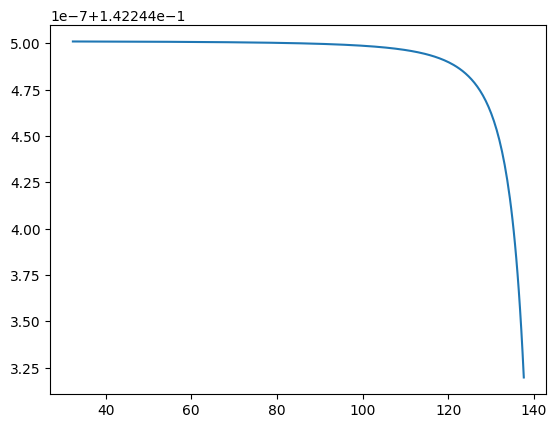

n0_star borders 0.0 2.6297041368872005
Diff Rho: 8.623103514404264
EJinv -103.14838954603385
EJderiv -33.07381843926143
EJinv diff 1j 2s: 2.6611704781173837
EJinv diff 1 sen: 8.38256751362716
EJinv diff 2 sen: 0.8240607986105878
n0_star borders 0.0 1.7238065064530905
Diff Rho: 6.989016988309308
EJinv -87.26051230579216
EJderiv -46.05739282796273
EJinv diff 1j 2s: 1.316492131238815
EJinv diff 1 sen: 2.368863229363875
EJinv diff 2 sen: 0.26448448581167433
n0_star borders 0.0 1.5363705636942384
Diff Rho: 8.218586911744586
EJinv -79.92101395484282
EJderiv -56.82539871125704
EJinv diff 1j 2s: 8.944002652730912
EJinv diff 1 sen: 6.2376701612400165
EJinv diff 2 sen: 0.21469243436183702
n0_star borders 0.0 1.6105765868425395
Diff Rho: 8.127511691801672
EJinv -78.4723552334387
EJderiv -66.38351230472392
EJinv diff 1j 2s: 2.6890592679405247
EJinv diff 1 sen: 0.9929908231154294
EJinv diff 2 sen: 0.7884345496082102
n0_star borders 0.0 1.6148907625682671
Diff Rho: 26.225223136987044
EJinv -80.97382

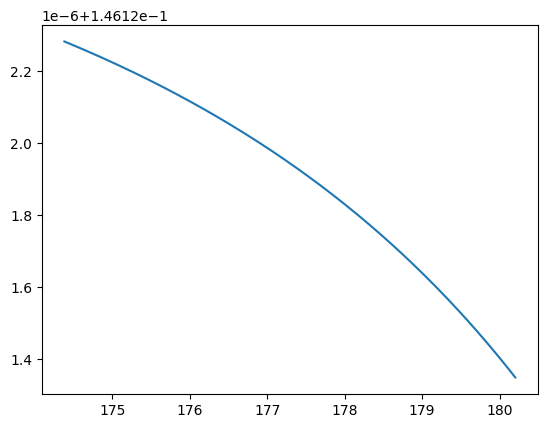

EJinv -64.1259112277418
EJderiv -58.68972223974487
EJinv diff 1j 2s: 0.25191918452766976
EJinv diff 1 sen: 0.19710250403189708
EJinv diff 2 sen: 0.1949900171291704
n0_star borders 0.0 1.0000000000786498
Diff Rho: 1.689028603213486
EJinv -62.50099547113228
EJderiv -58.2924555848345
EJinv diff 1j 2s: 0.2416721001778165
EJinv diff 1 sen: 0.1996801773326033
EJinv diff 2 sen: 0.19594614930322773
n0_star borders 0.0 1.0000000000925249
Diff Rho: 1.92711440884325
EJinv -60.812245817171664
EJderiv -56.74916766705485
EJinv diff 1j 2s: 0.24841847265715425
EJinv diff 1 sen: 0.20200979705820699
EJinv diff 2 sen: 0.19692124350056503
n0_star borders 0.0 1.0000000001086744
Diff Rho: 2.764036603990295
EJinv -59.317359769260875
EJderiv -53.83732644529658
EJinv diff 1j 2s: 0.25190228491813477
EJinv diff 1 sen: 0.20418210573265969
EJinv diff 2 sen: 0.19739329496603314
n0_star borders 0.0 1.0000000001273979
Diff Rho: 15.426744983906543
EJinv -57.97835304735375
EJderiv -52.44350728543276
EJinv diff 1j 2s: 0

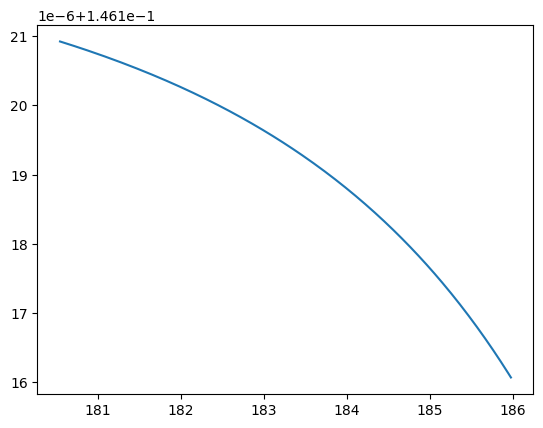

EJinv -3.164672017226927
EJderiv -1.4060524891433488
EJinv diff 1j 2s: 0.8363392859424802
EJinv diff 1 sen: 5.20497340750894
EJinv diff 2 sen: 0.5030189969295262
n0_star borders 0.0 0.0
Diff Rho: 0.3066256777783951
EJinv -2.971440060461348
EJderiv -2.563425510125228
EJinv diff 1j 2s: 0.7805561390679897
EJinv diff 1 sen: 2.863946135365698
EJinv diff 2 sen: 0.5374086454027489
n0_star borders 0.0 0.0
Diff Rho: 0.30293405885662433
EJinv -2.881631944057063
EJderiv -2.419742871860592
EJinv diff 1j 2s: 0.9307835018948509
EJinv diff 1 sen: 2.6825972032927377
EJinv diff 2 sen: 0.7675514535752902
n0_star borders 0.0 0.0
Diff Rho: 0.29944292988244997
EJinv -2.7569917090387293
EJderiv -2.4373469022910967
EJinv diff 1j 2s: 0.7309060008473538
EJinv diff 1 sen: 1.6075890703051352
EJinv diff 2 sen: 0.7773502837822449
n0_star borders 0.0 0.0
Diff Rho: 0.29613821700888415
EJinv -2.614265535586988
EJderiv -2.2304243894545266
EJinv diff 1j 2s: 3.4650984229864297
EJinv diff 1 sen: 1.7821990295288364
EJinv 

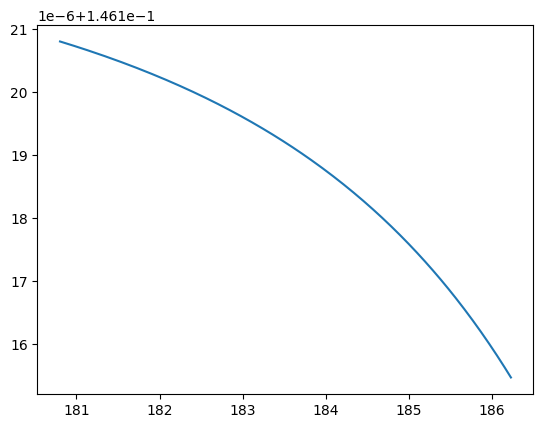

EJinv 2.7925703750976623
EJderiv 2.1009447167419353
EJinv diff 1j 2s: 3.8511837803614055
EJinv diff 1 sen: 0.17052592422202276
EJinv diff 2 sen: 1.421986593662314
n0_star borders 0.0 2.047801971591893
Diff Rho: 1.4206675585933641
EJinv 2.6231782745670698
EJderiv 1.6249841567307612
EJinv diff 1j 2s: 2.123720951645981
EJinv diff 1 sen: 0.20442182096987685
EJinv diff 2 sen: 0.49734782833635116
n0_star borders 0.0 1.9548779560493132
Diff Rho: 0.5498123380570673
EJinv 2.719367568412441
EJderiv 1.2656125402081102
EJinv diff 1j 2s: 1.666894832386176
EJinv diff 1 sen: 0.1715390021760349
EJinv diff 2 sen: 2.3308746698396665
n0_star borders 0.0 1.9177639156834583
Diff Rho: 0.5082096534702003
EJinv 2.8050063441834343
EJderiv 1.282098953729303
EJinv diff 1j 2s: 2.1359516728211494
EJinv diff 1 sen: 0.14720313624256068
EJinv diff 2 sen: 0.6679174497608036
n0_star borders 0.0 1.8844058129037178
Diff Rho: 0.48705087074247133
EJinv 2.8848446871726674
EJderiv 1.8978373826747656
EJinv diff 1j 2s: 1.93543

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\Multiworker_Contract_GE.py:1082: RuntimeWarning: divide by zero encountered in divide
  q=np.minimum(self.p.hire_c/(kappa-signon_bonus),1)


n0_star borders 0.0 4.0
Diff Rho: 0.5397538825361071
EJinv 1.5355628794130043
EJderiv 5.656601325093845
EJinv diff 1j 2s: 1.429019615831422
EJinv diff 1 sen: 7.466916242077958
EJinv diff 2 sen: 1.299923807002134
n0_star borders 0.0 4.0
Diff Rho: 0.1247879838654755
EJinv 4.529694954567135
EJderiv -101029.71395985481
EJinv diff 1j 2s: 0.8278207411083837
EJinv diff 1 sen: 27.51564448757507
EJinv diff 2 sen: 1.0074713449612822
n0_star borders 0.0 3.5186657402178354
Diff Rho: 0.09415236926142485
EJinv 6.080119744854766
EJderiv -85729.69436206158
EJinv diff 1j 2s: 0.8385096599408738
EJinv diff 1 sen: 2.1237154967390266
EJinv diff 2 sen: 1.119741457111116
n0_star borders 0.0 3.2437135769450345
Diff Rho: 0.18445446746082775
EJinv 6.893640896427334
EJderiv -77648.91320368815
EJinv diff 1j 2s: 0.8938965481060107
EJinv diff 1 sen: 3.3022007038624634
EJinv diff 2 sen: 1.101669229953495
n0_star borders 0.0 3.3153733281174675
Diff Rho: 0.21849283805941852
EJinv 7.145434701313272
EJderiv -80293.16218

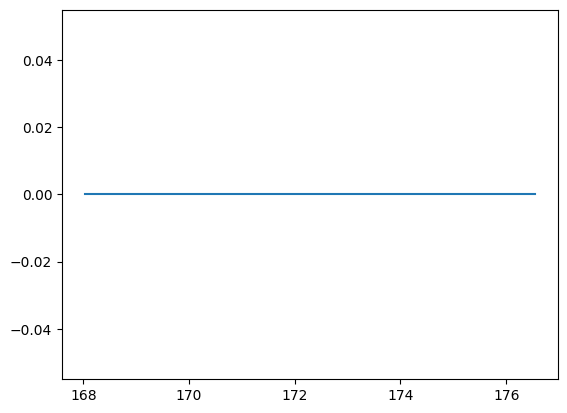

EJinv -1099.7095902459582
EJderiv -1182.9359918771484
EJinv diff 1j 2s: 0.06226279761451461
EJinv diff 1 sen: 0.5239164786307153
EJinv diff 2 sen: 0.010835047883570719
n0_star borders 0.0 1.963098133191264
Diff Rho: 27.48806024637977
EJinv -990.6195329621188
EJderiv -428.1733916059963
EJinv diff 1j 2s: 0.9047458879738326
EJinv diff 1 sen: 1.087627048447716
EJinv diff 2 sen: 0.010855584649881803
n0_star borders 0.0 1.8019323656054824
Diff Rho: 34.77455397480361
EJinv -859.4238267424493
EJderiv -395.671483765398
EJinv diff 1j 2s: 0.8003400865481844
EJinv diff 1 sen: 1.9439980743178422
EJinv diff 2 sen: 0.010992784079249978
n0_star borders 0.0 1.519898313030019
Diff Rho: 28.47815714277073
EJinv -755.5867528386998
EJderiv -370.19910865231805
EJinv diff 1j 2s: 0.7125180030981736
EJinv diff 1 sen: 2.1843683890304963
EJinv diff 2 sen: 0.011071169266063689
n0_star borders 0.0 1.0598690653560083
Diff Rho: 26.920812989527228
EJinv -673.4058020082482
EJderiv -348.89450099203026
EJinv diff 1j 2s: 

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:184: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


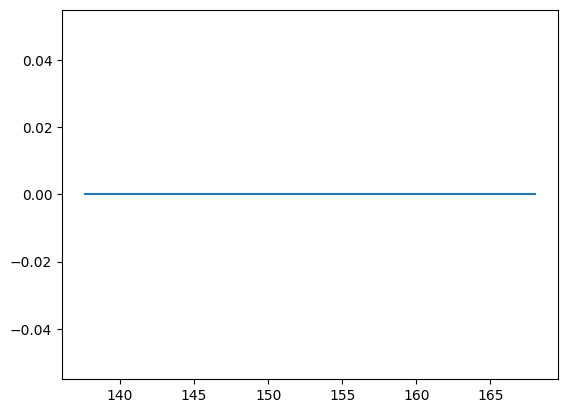

EJinv -11510.091078277937
EJderiv -377.7955663233224
EJinv diff 1j 2s: 82.09375513589804
EJinv diff 1 sen: 0.00835231604920096
EJinv diff 2 sen: 0.13502479481727359
n0_star borders 0.0 0.0
Diff Rho: 5.005067833961692
EJinv -16925.929202382318
EJderiv -222.7618893118232
EJinv diff 1j 2s: 63.00384733954459
EJinv diff 1 sen: 0.007711707525869695
EJinv diff 2 sen: 0.12711180532668503
n0_star borders 0.0 0.0
Diff Rho: 5.677340015521145
EJinv -13584.090998893418
EJderiv -232.7411181286183
EJinv diff 1j 2s: 48.053904762669895
EJinv diff 1 sen: 0.007413062633523622
EJinv diff 2 sen: 0.1220428188755798
n0_star borders 0.0 0.0
Diff Rho: 9.762970132444568
EJinv -10912.440963017698
EJderiv -205.18484527629218
EJinv diff 1j 2s: 62.91137563731203
EJinv diff 1 sen: 17.147672783875016
EJinv diff 2 sen: 0.11466076960162738
n0_star borders 0.0 0.0
Diff Rho: 5.908371669983642
EJinv -8775.359291084345
EJderiv -210.20608714217536
EJinv diff 1j 2s: 48.572812758659296
EJinv diff 1 sen: 31.385934948690938
EJi

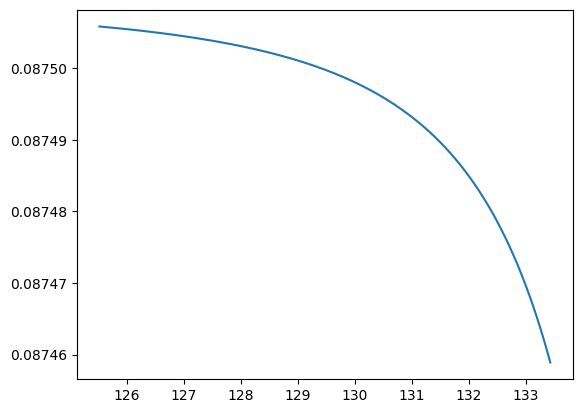

EJinv -17.62643442042134
EJderiv -14.023002360982332
EJinv diff 1j 2s: 0.2853748552615409
EJinv diff 1 sen: 1.2016019480282945
EJinv diff 2 sen: 2.546781717534481
n0_star borders 0.0 0.0
Diff Rho: 0.19686610866158738
EJinv -17.09876667138783
EJderiv -11.78720037097662
EJinv diff 1j 2s: 0.3865682415936096
EJinv diff 1 sen: 1.1626522091800777
EJinv diff 2 sen: 2.3900911523751787
n0_star borders 0.0 0.0
Diff Rho: 0.195675966680563
EJinv -15.832930802214447
EJderiv -12.139655098158016
EJinv diff 1j 2s: 0.3519915994811625
EJinv diff 1 sen: 1.3040070550276222
EJinv diff 2 sen: 2.489453937633995
n0_star borders 0.0 0.0
Diff Rho: 0.19451548810206062
EJinv -14.792001311279725
EJderiv -11.369818815787625
EJinv diff 1j 2s: 0.3288273640539621
EJinv diff 1 sen: 1.5140539117932685
EJinv diff 2 sen: 2.4357292982049534
n0_star borders 0.0 0.0
Diff Rho: 0.19338307246702435
EJinv -13.927527256415646
EJderiv -11.5022764275339
EJinv diff 1j 2s: 0.3104519565154274
EJinv diff 1 sen: 2.144626520050396
EJinv 

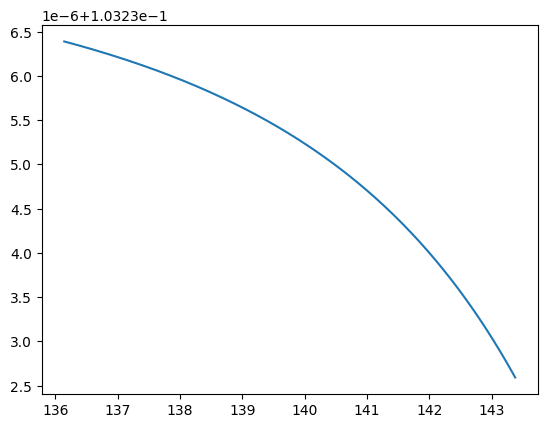

EJinv -5.986188549761948
EJderiv -3.187861057058001
EJinv diff 1j 2s: 0.9952250294696166
EJinv diff 1 sen: 1.7763860481532856
EJinv diff 2 sen: 0.8105138312548361
n0_star borders 0.0 1.9346216607019815
Diff Rho: 0.13511241004917807
EJinv -5.871610462758873
EJderiv -4.57716159759056
EJinv diff 1j 2s: 0.5986719057550064
EJinv diff 1 sen: 3.7516791711952715
EJinv diff 2 sen: 0.5197068983156237
n0_star borders 0.0 1.918037924746016
Diff Rho: 0.1335755784370729
EJinv -6.570636555855812
EJderiv -4.149259758028336
EJinv diff 1j 2s: 1.856238179688033
EJinv diff 1 sen: 1.9070659787193502
EJinv diff 2 sen: 0.464970611508177
n0_star borders 0.0 1.8966493778934557
Diff Rho: 0.13323833508939048
EJinv -7.064754893808104
EJderiv -4.0717704634108145
EJinv diff 1j 2s: 0.8639386497022614
EJinv diff 1 sen: 4.352523450560425
EJinv diff 2 sen: 1.243497795427572
n0_star borders 0.0 1.8704023022232341
Diff Rho: 0.13184961396368106
EJinv -7.418683880389537
EJderiv -4.2955367981029156
EJinv diff 1j 2s: 1.58648

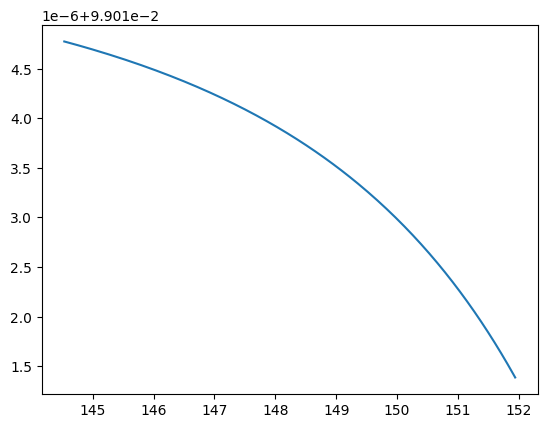

EJinv -4.69574054049206
EJderiv -2.315181341843868
EJinv diff 1j 2s: 1.1920861871068966
EJinv diff 1 sen: 2.7716835360529353
EJinv diff 2 sen: 0.4372555830836101
n0_star borders 0.0 1.3877323903380048
Diff Rho: 0.09495208602706946
EJinv -4.609288524808002
EJderiv -4.4883226521175175
EJinv diff 1j 2s: 0.9738747952238604
EJinv diff 1 sen: 2.3832943350948153
EJinv diff 2 sen: 0.3815635340755037
n0_star borders 0.0 1.3855801352404253
Diff Rho: 0.09341960466964708
EJinv -5.266082292946247
EJderiv -3.490384508010095
EJinv diff 1j 2s: 0.7828740792640999
EJinv diff 1 sen: 38.18141665926042
EJinv diff 2 sen: 0.5523643641346841
n0_star borders 0.0 1.3876922600337203
Diff Rho: 0.09198046963753002
EJinv -5.68764682713963
EJderiv -4.011150413734583
EJinv diff 1j 2s: 3.011794909483157
EJinv diff 1 sen: 2.804100910497863
EJinv diff 2 sen: 0.4943335839348252
n0_star borders 0.0 1.392382588096585
Diff Rho: 0.09062678430735208
EJinv -5.967054926929273
EJderiv -3.3647956364665106
EJinv diff 1j 2s: 1.0929

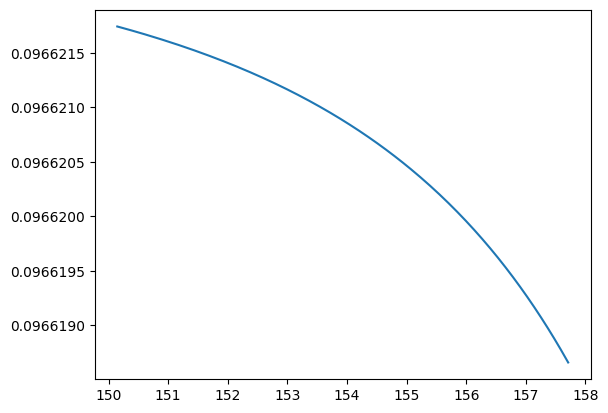

EJinv -2.8813255733543035
EJderiv -1.065584563573168
EJinv diff 1j 2s: 7.203110896887327
EJinv diff 1 sen: 2.666489415251794
EJinv diff 2 sen: 0.42458210574671823
n0_star borders 0.0 1.4156106804249688
Diff Rho: 0.051727426268534896
EJinv -2.814207429609398
EJderiv -2.779239617466999
EJinv diff 1j 2s: 0.4512582305289202
EJinv diff 1 sen: 5.862822778508078
EJinv diff 2 sen: 0.49354867995865465
n0_star borders 0.0 1.4114118339121764
Diff Rho: 0.050457554478616884
EJinv -3.348856982005748
EJderiv -2.308752784632759
EJinv diff 1j 2s: 0.45897264942738825
EJinv diff 1 sen: 4.948328800661248
EJinv diff 2 sen: 1.7942873713165253
n0_star borders 0.0 1.412909182226919
Diff Rho: 0.04926311056020216
EJinv -3.6642730575980704
EJderiv -1.9960141333838237
EJinv diff 1j 2s: 0.5502208349420266
EJinv diff 1 sen: 65.56515340471074
EJinv diff 2 sen: 0.5093683995169109
n0_star borders 0.0 1.4178479318599233
Diff Rho: 0.048133064592860396
EJinv -3.8565462904165844
EJderiv -2.8370961420191634
EJinv diff 1j 2

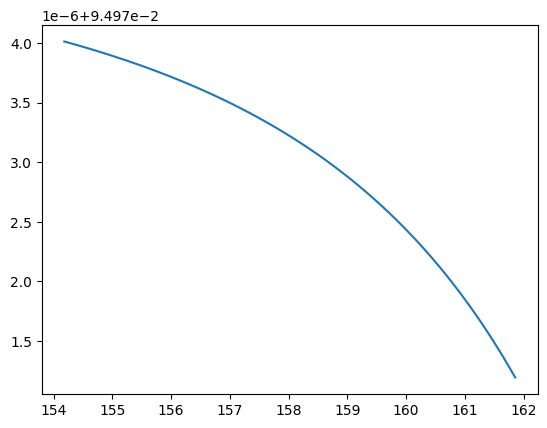

EJinv -1.8137342321659333
EJderiv 0.18709626961475578
EJinv diff 1j 2s: 3.6030437443989523
EJinv diff 1 sen: 5.133602047158202
EJinv diff 2 sen: 0.4985336761731214
n0_star borders 0.0 1.42086439128229
Diff Rho: 0.02025025025343708
EJinv -1.7606701468306571
EJderiv -2.115092632560959
EJinv diff 1j 2s: 0.5968748961061534
EJinv diff 1 sen: 6.1836271985790825
EJinv diff 2 sen: 1.1585036180740445
n0_star borders 0.0 1.418510571780081
Diff Rho: 0.0202178447872608
EJinv -2.157050467854658
EJderiv -1.5945913780144565
EJinv diff 1j 2s: 0.8872704584739141
EJinv diff 1 sen: 4.103430606510047
EJinv diff 2 sen: 0.47018237447541383
n0_star borders 0.0 1.4217036821943019
Diff Rho: 0.020185532076083382
EJinv -2.3683397236427504
EJderiv -1.6865492210131379
EJinv diff 1j 2s: 0.3804461074085317
EJinv diff 1 sen: 5.152079896942235
EJinv diff 2 sen: 0.529195712972365
n0_star borders 0.0 1.4281285935132377
Diff Rho: 0.02041480219409243
EJinv -2.484401505922918
EJderiv -1.148332569969341
EJinv diff 1j 2s: 0.

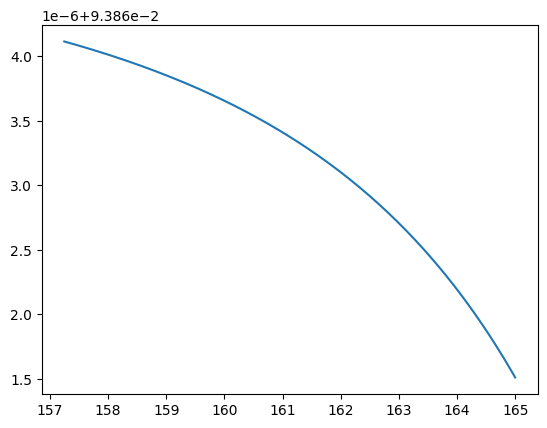

EJinv -1.2233712876544445
EJderiv 0.5067833862776752
EJinv diff 1j 2s: 0.7054576137129421
EJinv diff 1 sen: 2.3054243230814047
EJinv diff 2 sen: 0.4136600765577308
n0_star borders 0.0 1.4717962849777888
Diff Rho: 0.04634243504986913
EJinv -1.17583567631571
EJderiv -1.546086006552514
EJinv diff 1j 2s: 1.3544016431374921
EJinv diff 1 sen: 1.7586000741417782
EJinv diff 2 sen: 0.34602404686058735
n0_star borders 0.0 1.4651820409799912
Diff Rho: 0.04733319126005749
EJinv -1.4420173528860567
EJderiv -1.2860358949700412
EJinv diff 1j 2s: 0.7316073288931438
EJinv diff 1 sen: 1.7621168394706486
EJinv diff 2 sen: 0.4298109866666775
n0_star borders 0.0 1.4647693320336506
Diff Rho: 0.04827311193375718
EJinv -1.560870625957909
EJderiv -0.971868245434564
EJinv diff 1j 2s: 1.024008491647439
EJinv diff 1 sen: 4.105092130731632
EJinv diff 2 sen: 0.541759330524961
n0_star borders 0.0 1.4681606613321947
Diff Rho: 0.049165119602383144
EJinv -1.609874348930328
EJderiv -1.1197375511470682
EJinv diff 1j 2s: 

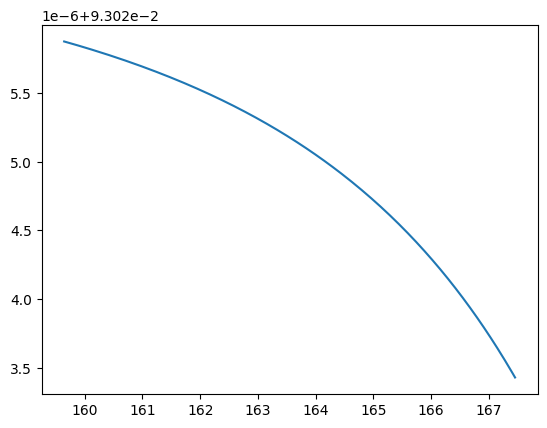

EJinv -0.8876112446864457
EJderiv -0.05484229369756122
EJinv diff 1j 2s: 0.9034456605679327
EJinv diff 1 sen: 1.5650681404292968
EJinv diff 2 sen: 0.45105051557851217
n0_star borders 0.0 1.5344636582084918
Diff Rho: 0.08534943450256745
EJinv -0.8523203749519696
EJderiv -1.5884962670617142
EJinv diff 1j 2s: 0.5510371166337722
EJinv diff 1 sen: 1.3950664051316999
EJinv diff 2 sen: 0.3754519318570066
n0_star borders 0.0 1.5223737249548877
Diff Rho: 0.08606254591422684
EJinv -1.012412225764588
EJderiv -1.0248022539356612
EJinv diff 1j 2s: 0.2879826415366366
EJinv diff 1 sen: 25.85005164829455
EJinv diff 2 sen: 0.5841044730318669
n0_star borders 0.0 1.5171172865887157
Diff Rho: 0.08672464296603073
EJinv -1.0849179896390935
EJderiv -0.6549968730349178
EJinv diff 1j 2s: 0.6174042190886297
EJinv diff 1 sen: 1.5349419833347793
EJinv diff 2 sen: 1.0382389136156376
n0_star borders 0.0 1.516331580142462
Diff Rho: 0.08734237394266249
EJinv -1.1026288429447868
EJderiv -0.6930318774250281
EJinv diff 

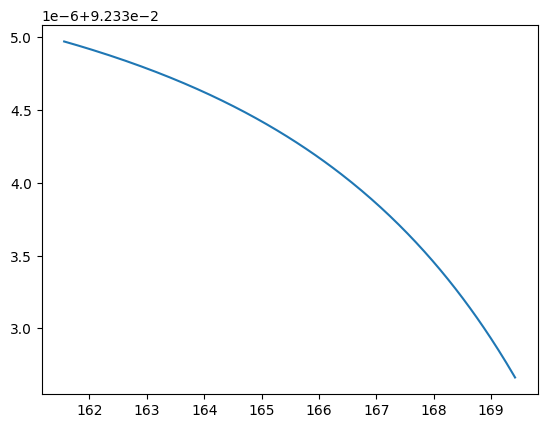

EJinv -0.6314544471065544
EJderiv 0.5356464506530187
EJinv diff 1j 2s: 0.5690630363576262
EJinv diff 1 sen: 0.5825581562172237
EJinv diff 2 sen: 0.4088432824501013
n0_star borders 0.0 1.5835933181955952
Diff Rho: 0.11497552308815921
EJinv -0.6039599189397752
EJderiv -0.35897876407767626
EJinv diff 1j 2s: 0.36495955903603766
EJinv diff 1 sen: 0.5798007124383674
EJinv diff 2 sen: 0.8683634226050706
n0_star borders 0.0 1.5683097156365056
Diff Rho: 0.11539575747608455
EJinv -0.6870572600254257
EJderiv -0.1582363472069801
EJinv diff 1j 2s: 0.2488899244044561
EJinv diff 1 sen: 0.5847300133771458
EJinv diff 2 sen: 0.9121542641063174
n0_star borders 0.0 1.559881161967145
Diff Rho: 0.11577161403266338
EJinv -0.7242005801925042
EJderiv -0.1563631933203169
EJinv diff 1j 2s: 0.28412159557888955
EJinv diff 1 sen: 0.5951869778928229
EJinv diff 2 sen: 0.4281482068156738
n0_star borders 0.0 1.5561525912117569
Diff Rho: 0.11610993585877795
EJinv -0.7344181926188094
EJderiv 0.19275685619544447
EJinv dif

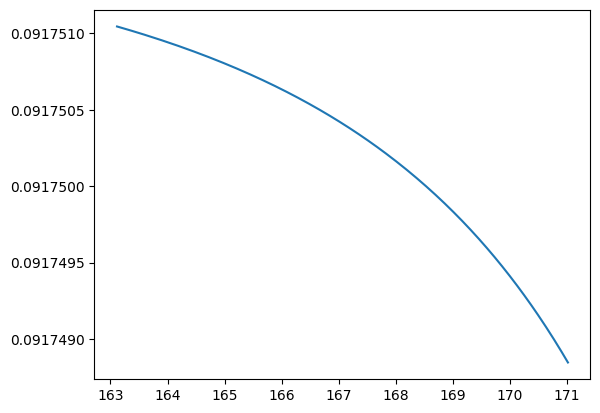

EJinv -0.35839198893478624
EJderiv 0.3624951990407226
EJinv diff 1j 2s: 0.5024488647865877
EJinv diff 1 sen: 0.4697777999553418
EJinv diff 2 sen: 0.6309757228544883
n0_star borders 0.0 1.6218672059857238
Diff Rho: 0.13188789513462024
EJinv -0.3470419534661752
EJderiv -0.7044638140478128
EJinv diff 1j 2s: 0.5675029647406864
EJinv diff 1 sen: 0.4662861975443279
EJinv diff 2 sen: 0.4703469260983049
n0_star borders 0.0 1.605011104038719
Diff Rho: 0.1320538813466473
EJinv -0.3854171002415392
EJderiv -0.10378949084008582
EJinv diff 1j 2s: 0.24178012027937862
EJinv diff 1 sen: 0.4715807515837329
EJinv diff 2 sen: 0.5602751658023383
n0_star borders 0.0 1.59468189780939
Diff Rho: 0.13218121864167573
EJinv -0.4034855415588907
EJderiv 0.4003170743262672
EJinv diff 1j 2s: 0.26797164828879044
EJinv diff 1 sen: 0.4757026000140203
EJinv diff 2 sen: 0.4464065068289784
n0_star borders 0.0 1.5889972871073932
Diff Rho: 0.13227713358222137
EJinv -0.40765080152848177
EJderiv 0.2240257119107696
EJinv diff 1

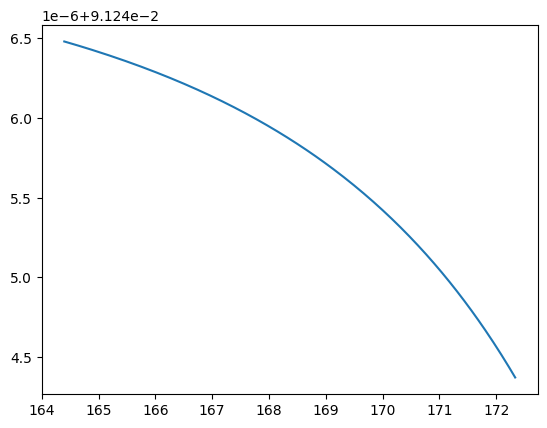

EJinv -0.05166189037787108
EJderiv 0.6084662536954397
EJinv diff 1j 2s: 0.329741122653246
EJinv diff 1 sen: 0.41329506518818815
EJinv diff 2 sen: 1.2489380337215337
n0_star borders 0.0 1.648849679630794
Diff Rho: 0.13518681826724732
EJinv -0.044456650030679494
EJderiv 0.15714324517205114
EJinv diff 1j 2s: 0.756462138219409
EJinv diff 1 sen: 0.410597215257127
EJinv diff 2 sen: 0.9194829717995272
n0_star borders 0.0 1.6317800132933127
Diff Rho: 0.13519356429698925
EJinv -0.07016421718201313
EJderiv 0.23640941841961194
EJinv diff 1j 2s: 0.3798256172681737
EJinv diff 1 sen: 0.4142694575027966
EJinv diff 2 sen: 0.44726241048848675
n0_star borders 0.0 1.6207099301947723
Diff Rho: 0.13516608136239852
EJinv -0.09073923391827335
EJderiv 0.30388629414204615
EJinv diff 1j 2s: 0.2605083018718876
EJinv diff 1 sen: 0.4178323950679288
EJinv diff 2 sen: 0.7650311147861139
n0_star borders 0.0 1.6140261308898713
Diff Rho: 0.1351116566393137
EJinv -0.1051031391258326
EJderiv -0.22370954171481117
EJinv di

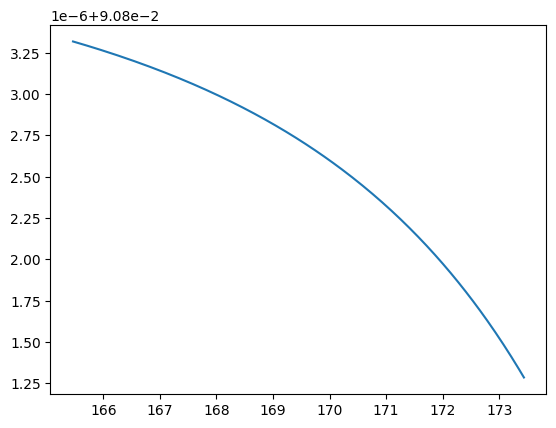

EJinv 0.19538187549317315
EJderiv 0.5248573939699668
EJinv diff 1j 2s: 0.22665344169248694
EJinv diff 1 sen: 0.3779689400702836
EJinv diff 2 sen: 1.0362679700299158
n0_star borders 0.0 1.665190958053011
Diff Rho: 0.12831901155562045
EJinv 0.2013725492763946
EJderiv 0.11208555604679304
EJinv diff 1j 2s: 0.39246191950640175
EJinv diff 1 sen: 0.37712682318579765
EJinv diff 2 sen: 0.5134838054954489
n0_star borders 0.0 1.6489623677519987
Diff Rho: 0.12826192783122714
EJinv 0.17982545777332504
EJderiv 0.7575932297615395
EJinv diff 1j 2s: 0.350164092722449
EJinv diff 1 sen: 0.38028945013196136
EJinv diff 2 sen: 0.44489164243340934
n0_star borders 0.0 1.6381260470052315
Diff Rho: 0.12817352523105394
EJinv 0.15501599467921473
EJderiv 0.45815320261078796
EJinv diff 1j 2s: 0.34512462191667126
EJinv diff 1 sen: 0.3827935124615545
EJinv diff 2 sen: 0.3913211690477733
n0_star borders 0.0 1.6312944818613482
Diff Rho: 0.1280611512132272
EJinv 0.13239947930185395
EJderiv 0.6340552361941718
EJinv diff 

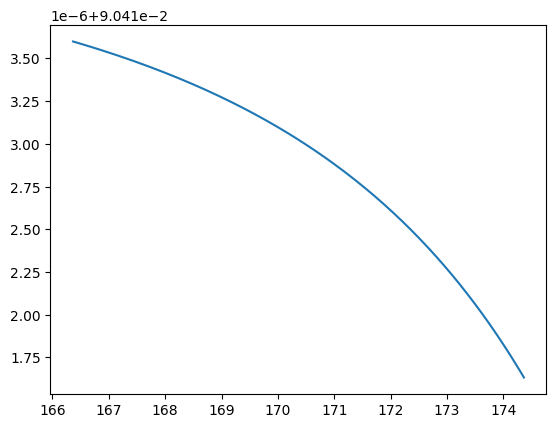

EJinv 0.3888208814545685
EJderiv 0.8756369475335646
EJinv diff 1j 2s: 0.3319482290645628
EJinv diff 1 sen: 0.35697941292697194
EJinv diff 2 sen: 0.3771026633782463
n0_star borders 0.0 1.67524858597193
Diff Rho: 0.11629528864391477
EJinv 0.3936284597237525
EJderiv 0.11623305840180365
EJinv diff 1j 2s: 0.34494460439070695
EJinv diff 1 sen: 0.3562089270707356
EJinv diff 2 sen: 0.4076512441387706
n0_star borders 0.0 1.6602816595666796
Diff Rho: 0.1162318920002646
EJinv 0.377221304714008
EJderiv 0.373619969329809
EJinv diff 1j 2s: 0.3044748017367364
EJinv diff 1 sen: 0.3581373372522967
EJinv diff 2 sen: 0.4531300801974456
n0_star borders 0.0 1.6501161122125638
Diff Rho: 0.11613941169190334
EJinv 0.3501827890884645
EJderiv 0.7799951962596197
EJinv diff 1j 2s: 0.42587673438509227
EJinv diff 1 sen: 0.3589016417424994
EJinv diff 2 sen: 0.3636046645036203
n0_star borders 0.0 1.6435492825043
Diff Rho: 0.11602510399985415
EJinv 0.3220805477414595
EJderiv 0.6937162256505189
EJinv diff 1j 2s: 0.2076

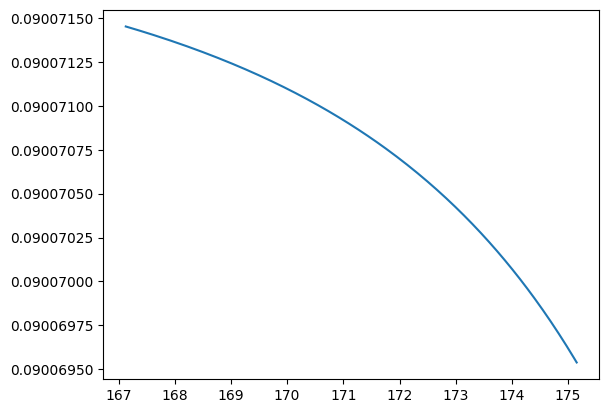

EJinv 0.5486644721842784
EJderiv 0.5434869127332718
EJinv diff 1j 2s: 2.947993855585229
EJinv diff 1 sen: 0.3401291339808557
EJinv diff 2 sen: 0.39003048164335874
n0_star borders 0.0 1.6815917643137528
Diff Rho: 0.10285131206051958
EJinv 0.552384788351301
EJderiv 0.10772770323222858
EJinv diff 1j 2s: 0.2918855318807824
EJinv diff 1 sen: 0.3390318942243068
EJinv diff 2 sen: 0.3851932197124297
n0_star borders 0.0 1.6679991933744915
Diff Rho: 0.10280332954895396
EJinv 0.5395606880185233
EJderiv 1.0500091889525152
EJinv diff 1j 2s: 0.2860277486162064
EJinv diff 1 sen: 0.3397749350362878
EJinv diff 2 sen: 0.45021936205786944
n0_star borders 0.0 1.6586668052659714
Diff Rho: 0.10272871469438742
EJinv 0.5103461184031863
EJderiv 0.19925677927733432
EJinv diff 1j 2s: 0.6328141998701836
EJinv diff 1 sen: 0.3412016217050345
EJinv diff 2 sen: 4.870270004814533
n0_star borders 0.0 1.6525446129579684
Diff Rho: 0.10263415491307719
EJinv 0.4776173270536945
EJderiv 0.9043966759034561
EJinv diff 1j 2s: 0

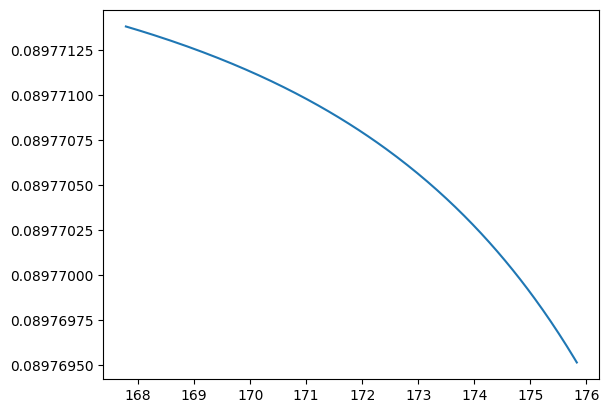

EJinv 0.6830106815983682
EJderiv 0.4450965848399733
EJinv diff 1j 2s: 0.20952645528366767
EJinv diff 1 sen: 0.3278225347278049
EJinv diff 2 sen: 1.053067041225561
n0_star borders 0.0 1.6856651362700037
Diff Rho: 0.0899275487790798
EJinv 0.6858347418886199
EJderiv 1.0859230140695217
EJinv diff 1j 2s: 0.36028560602037707
EJinv diff 1 sen: 0.32672368061400664
EJinv diff 2 sen: 1.705853528783149
n0_star borders 0.0 1.673420797770941
Diff Rho: 0.0898983692723481
EJinv 0.6742890510369318
EJderiv 0.6807389355455484
EJinv diff 1j 2s: 0.24413768273364758
EJinv diff 1 sen: 0.32832813957833024
EJinv diff 2 sen: 0.3788954187924738
n0_star borders 0.0 1.6649530054217871
Diff Rho: 0.0898450525249388
EJinv 0.6421189343256938
EJderiv 0.633000712998637
EJinv diff 1j 2s: 0.3311549445586808
EJinv diff 1 sen: 0.32988416119773295
EJinv diff 2 sen: 0.370575621950959
n0_star borders 0.0 1.659339727285977
Diff Rho: 0.08977375612636217
EJinv 0.6052338323629515
EJderiv 1.1856647838079084
EJinv diff 1j 2s: 0.510

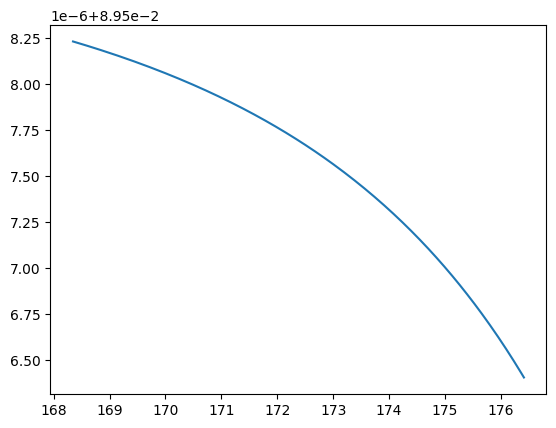

EJinv 0.796790059641344
EJderiv 0.5120537042749902
EJinv diff 1j 2s: 0.2540211549124203
EJinv diff 1 sen: 0.3182879188753748
EJinv diff 2 sen: 0.38253513233329794
n0_star borders 0.0 1.6883133565353954
Diff Rho: 0.07829180304425991
EJinv 0.7989782815725802
EJderiv 1.0198035891035033
EJinv diff 1j 2s: 0.3291093411120297
EJinv diff 1 sen: 0.31808219587412195
EJinv diff 2 sen: 0.49222258623217274
n0_star borders 0.0 1.6773309832595356
Diff Rho: 0.07827864488949324
EJinv 0.7796513027713746
EJderiv 1.2504074462223116
EJinv diff 1j 2s: 0.25309061091806756
EJinv diff 1 sen: 0.31931063274610855
EJinv diff 2 sen: 0.3719326558111067
n0_star borders 0.0 1.6696975581112157
Diff Rho: 0.0782438562061489
EJinv 0.745638638597149
EJderiv 1.013088846025937
EJinv diff 1j 2s: 0.42963132439537066
EJinv diff 1 sen: 0.3196871599277062
EJinv diff 2 sen: 0.36073447155787725
n0_star borders 0.0 1.6645997346625716
Diff Rho: 0.07819293377938002
EJinv 0.7063695324951534
EJderiv 0.45454367627735337
EJinv diff 1j 2s

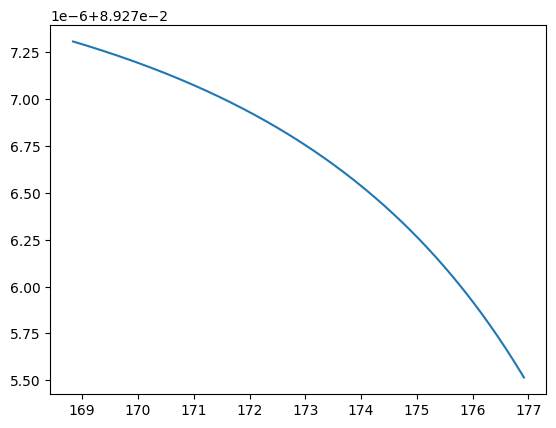

EJinv 0.8867732505943818
EJderiv 0.626096656344771
EJinv diff 1j 2s: 0.7787657766830343
EJinv diff 1 sen: 0.3116426200816022
EJinv diff 2 sen: 0.32920488956221644
n0_star borders 0.0 1.6900424849779592
Diff Rho: 0.06813567063181172
EJinv 0.8905185484871467
EJderiv 0.7633464967423151
EJinv diff 1j 2s: 1.025133976836189
EJinv diff 1 sen: 0.3105738524851254
EJinv diff 2 sen: 0.34169482685856045
n0_star borders 0.0 1.680212173854866
Diff Rho: 0.06813266213253254
EJinv 0.8538528449261614
EJderiv 0.7108134199149276
EJinv diff 1j 2s: 0.319008034883222
EJinv diff 1 sen: 0.311267530223511
EJinv diff 2 sen: 0.43115594769212207
n0_star borders 0.0 1.6733548491343866
Diff Rho: 0.06811125718679266
EJinv 0.8153379842214217
EJderiv 1.288956506400723
EJinv diff 1j 2s: 0.6785810956216625
EJinv diff 1 sen: 0.3118796254512851
EJinv diff 2 sen: 1.3086495963887088
n0_star borders 0.0 1.668750374923056
Diff Rho: 0.06807598734467106
EJinv 0.777303131014043
EJderiv 0.6148020776201975
EJinv diff 1j 2s: 0.31249

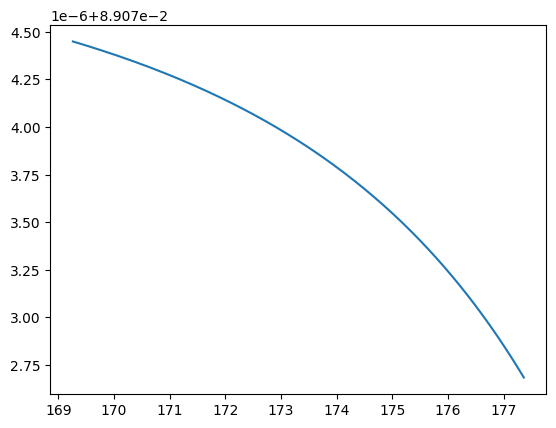

EJinv 0.9224635826820796
EJderiv 1.5004549584819529
EJinv diff 1j 2s: 0.23777145741645556
EJinv diff 1 sen: 0.30560011999212594
EJinv diff 2 sen: 0.39044918848396837
n0_star borders 0.0 1.6911793063238785
Diff Rho: 0.059399974904868084
EJinv 0.930024446837897
EJderiv 0.9613962284738022
EJinv diff 1j 2s: 0.3812061247614518
EJinv diff 1 sen: 0.30458827885032447
EJinv diff 2 sen: 0.3949733529023881
n0_star borders 0.0 1.6823864656266139
Diff Rho: 0.05940405335730218
EJinv 0.8881347037426234
EJderiv 0.8037040678301537
EJinv diff 1j 2s: 0.27870518505544806
EJinv diff 1 sen: 0.30533872697200104
EJinv diff 2 sen: 0.40440721134912394
n0_star borders 0.0 1.6762365762315863
Diff Rho: 0.059392097156927295
EJinv 0.8480068731064184
EJderiv 1.2932588002987586
EJinv diff 1j 2s: 0.3044929253107205
EJinv diff 1 sen: 0.3054125398677159
EJinv diff 2 sen: 0.5149801590629092
n0_star borders 0.0 1.6720901164049027
Diff Rho: 0.05936805659953024
EJinv 0.8116045876866357
EJderiv 0.565979650032375
EJinv diff 1j

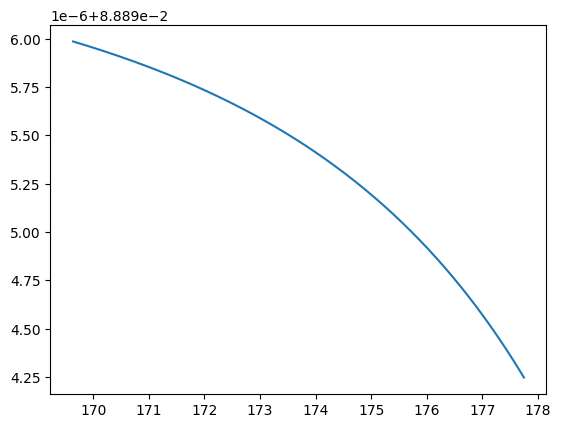

EJinv 0.9263742196394208
EJderiv 1.1673045565651137
EJinv diff 1j 2s: 0.46673771401740016
EJinv diff 1 sen: 0.2998185786418618
EJinv diff 2 sen: 0.5648634748850151
n0_star borders 0.0 1.6919199626079302
Diff Rho: 0.05193534100821361
EJinv 0.9339081199905092
EJderiv 1.0803318420847745
EJinv diff 1j 2s: 0.4354921332714852
EJinv diff 1 sen: 0.2997209419845351
EJinv diff 2 sen: 0.41269297552848755
n0_star borders 0.0 1.6840540558825103
Diff Rho: 0.05194408350478713
EJinv 0.8961629705470001
EJderiv 0.8311735068955954
EJinv diff 1j 2s: 0.40298985348045707
EJinv diff 1 sen: 0.2998403272255565
EJinv diff 2 sen: 0.44582220635638314
n0_star borders 0.0 1.6785416002675457
Diff Rho: 0.05193899819057803
EJinv 0.8604136124115842
EJderiv 1.2614950635251603
EJinv diff 1j 2s: 0.950107287619929
EJinv diff 1 sen: 0.30080204312749353
EJinv diff 2 sen: 0.6929844429765398
n0_star borders 0.0 1.6748131615345627
Diff Rho: 0.051923369644335214
EJinv 0.8285229405211434
EJderiv 0.49953792109056394
EJinv diff 1j 

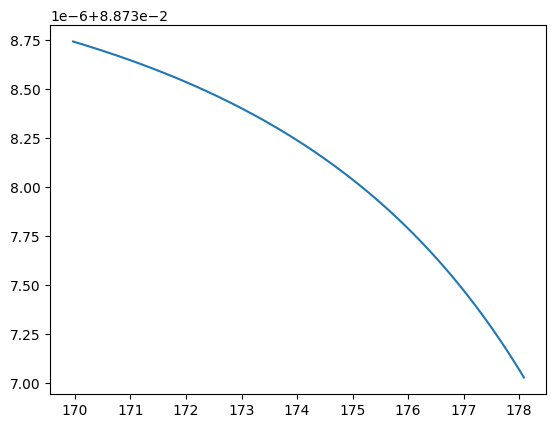

EJinv 0.9279371781190557
EJderiv 0.9050249720298211
EJinv diff 1j 2s: 3.4732302551205416
EJinv diff 1 sen: 0.2963484563516499
EJinv diff 2 sen: 0.3571800416859172
n0_star borders 0.0 1.6924021319740286
Diff Rho: 0.04557653851916175
EJinv 0.93452234884458
EJderiv 1.2691551100054994
EJinv diff 1j 2s: 0.4000517378394711
EJinv diff 1 sen: 0.29546673766062725
EJinv diff 2 sen: 0.3461279910229352
n0_star borders 0.0 1.6853604114885308
Diff Rho: 0.04558517268320518
EJinv 0.900798344346587
EJderiv 0.9353785038694014
EJinv diff 1j 2s: 1.6115374359724375
EJinv diff 1 sen: 0.2960652140285373
EJinv diff 2 sen: 0.33693692713592616
n0_star borders 0.0 1.680418070882031
Diff Rho: 0.04558395249734066
EJinv 0.8690651567098815
EJderiv 1.3162681863731223
EJinv diff 1j 2s: 0.7406783965536942
EJinv diff 1 sen: 0.2965437736997556
EJinv diff 2 sen: 0.36153650232729095
n0_star borders 0.0 1.6770669001437655
Diff Rho: 0.04557448670091821
EJinv 0.8411465247232309
EJderiv 0.5293920895740598
EJinv diff 1j 2s: 0.2

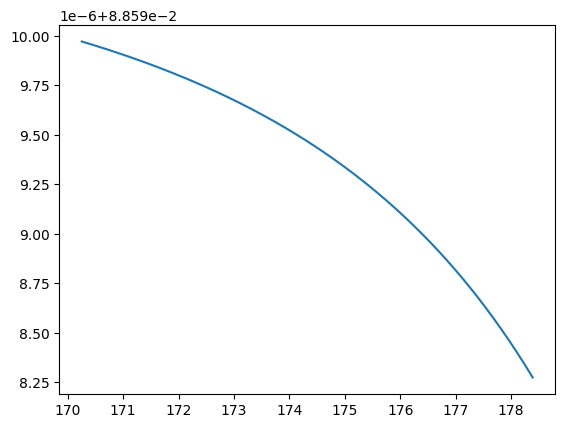

EJinv 0.9295603621796118
EJderiv 0.792255255023008
EJinv diff 1j 2s: 0.3525059756311041
EJinv diff 1 sen: 0.29324447313931595
EJinv diff 2 sen: 0.5160418601514986
n0_star borders 0.0 1.6927078704108798
Diff Rho: 0.04016248069868335
EJinv 0.9353192178904172
EJderiv 0.5522900251725673
EJinv diff 1j 2s: 0.2980799771699789
EJinv diff 1 sen: 0.29264366521222884
EJinv diff 2 sen: 0.45673070715933023
n0_star borders 0.0 1.6863967804660844
Diff Rho: 0.040170192301384945
EJinv 0.9049728248554445
EJderiv 1.1464990783289863
EJinv diff 1j 2s: 0.6439798695929956
EJinv diff 1 sen: 0.2934569454801246
EJinv diff 2 sen: 0.39042218096840164
n0_star borders 0.0 1.6819620504606623
Diff Rho: 0.04017026843107986
EJinv 0.8766509327630446
EJderiv 0.4841924246150029
EJinv diff 1j 2s: 0.9639055995914068
EJinv diff 1 sen: 0.293794912067176
EJinv diff 2 sen: 0.3621281917590071
n0_star borders 0.0 1.678949088422642
Diff Rho: 0.04016378279159003
EJinv 0.8520464212993125
EJderiv 0.6760572871996828
EJinv diff 1j 2s: 

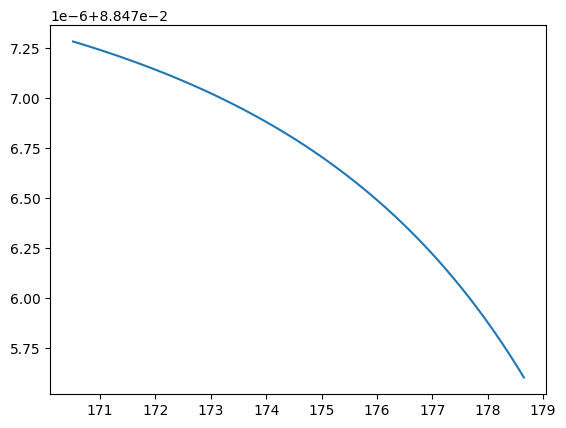

EJinv 0.9311444842760395
EJderiv 0.8120088508063645
EJinv diff 1j 2s: 0.47678483133550914
EJinv diff 1 sen: 0.2901607029942989
EJinv diff 2 sen: 0.3236804027563567
n0_star borders 0.0 1.6928954982133084
Diff Rho: 0.0355476098866313
EJinv 0.9361707122832187
EJderiv 0.9177142812722536
EJinv diff 1j 2s: 0.2974639656372952
EJinv diff 1 sen: 0.2902726784649382
EJinv diff 2 sen: 0.32399981913384046
n0_star borders 0.0 1.687232709575404
Diff Rho: 0.035554129007170705
EJinv 0.9088374233609333
EJderiv 1.4490603980846117
EJinv diff 1j 2s: 0.24931409410759642
EJinv diff 1 sen: 0.29066856660219287
EJinv diff 2 sen: 0.33598951913708375
n0_star borders 0.0 1.683249883953597
Diff Rho: 0.03555487412573267
EJinv 0.8834176324515989
EJderiv 0.749968855409179
EJinv diff 1j 2s: 0.41512058916590516
EJinv diff 1 sen: 0.2906715777532927
EJinv diff 2 sen: 0.3948037372432164
n0_star borders 0.0 1.680539610443981
Diff Rho: 0.03555051012327997
EJinv 0.8616701604117853
EJderiv 0.9236666513146474
EJinv diff 1j 2s: 

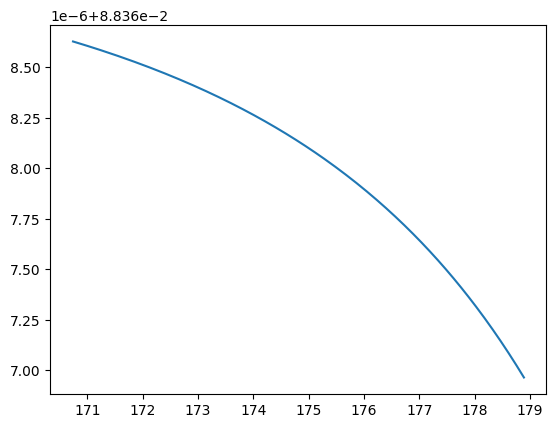

EJinv 0.9329784928336732
EJderiv 0.9496491982184239
EJinv diff 1j 2s: 3.4097545876013773
EJinv diff 1 sen: 0.28739727472790044
EJinv diff 2 sen: 0.3326355932427941
n0_star borders 0.0 1.6930033025661568
Diff Rho: 0.0316074553345384
EJinv 0.9373143905881445
EJderiv 1.3580802118042357
EJinv diff 1j 2s: 2.59992850868738
EJinv diff 1 sen: 0.2871761258453058
EJinv diff 2 sen: 0.3263607986363876
n0_star borders 0.0 1.6879145131401678
Diff Rho: 0.031612670327391595
EJinv 0.9126470229140037
EJderiv 0.8329141667070985
EJinv diff 1j 2s: 0.46328346436856294
EJinv diff 1 sen: 0.2879599398356646
EJinv diff 2 sen: 0.3363318891831225
n0_star borders 0.0 1.6843327882181436
Diff Rho: 0.03161371018737374
EJinv 0.889754627998248
EJderiv 1.1069352733612732
EJinv diff 1j 2s: 0.3386463020349923
EJinv diff 1 sen: 0.28819792666828126
EJinv diff 2 sen: 0.34178528392144547
n0_star borders 0.0 1.6818922642651475
Diff Rho: 0.031610781334280955
EJinv 0.8705228902432566
EJderiv 1.2662395040450178
EJinv diff 1j 2s: 

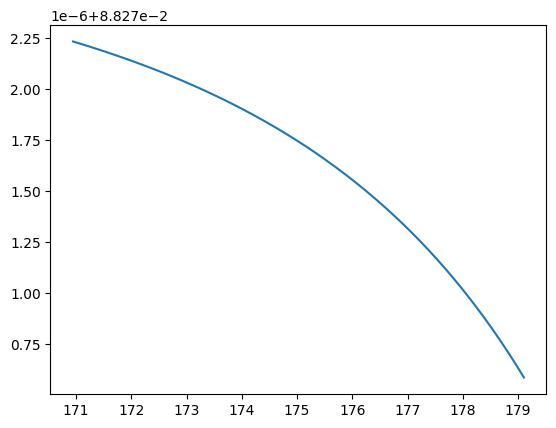

EJinv 0.9354875577878728
EJderiv 1.1951105172913117
EJinv diff 1j 2s: 0.32123653560413196
EJinv diff 1 sen: 0.28565968036182376
EJinv diff 2 sen: 0.49845722238245327
n0_star borders 0.0 1.6930557718337296
Diff Rho: 0.02823606875004505
EJinv 0.9391452568372234
EJderiv 0.871708510120925
EJinv diff 1j 2s: 1.3124280071244108
EJinv diff 1 sen: 0.2856723137042394
EJinv diff 2 sen: 0.42632974794191936
n0_star borders 0.0 1.6884763684098951
Diff Rho: 0.028239990141049196
EJinv 0.9167420782519206
EJderiv 1.2952192241413059
EJinv diff 1j 2s: 0.2897512838810827
EJinv diff 1 sen: 0.2861901818455159
EJinv diff 2 sen: 0.3665281952320754
n0_star borders 0.0 1.6852513189812617
Diff Rho: 0.028241073555013655
EJinv 0.8960445959565971
EJderiv 0.5438653537626124
EJinv diff 1j 2s: 0.698476605328234
EJinv diff 1 sen: 0.2865831946700967
EJinv diff 2 sen: 0.3444165171003167
n0_star borders 0.0 1.6830514818256979
Diff Rho: 0.028239160892182025
EJinv 0.8789763409327361
EJderiv 0.6899626717967067
EJinv diff 1j 2

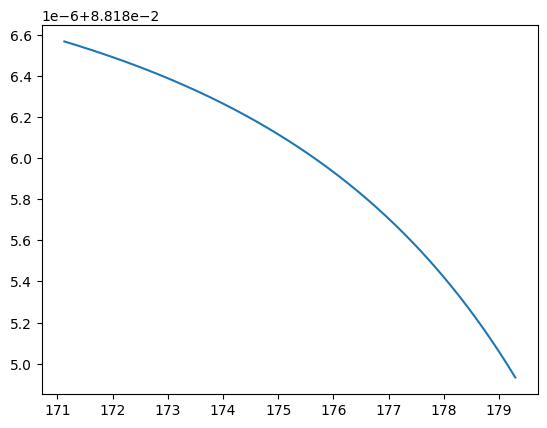

EJinv 0.9391781420432294
EJderiv 1.5498036171624108
EJinv diff 1j 2s: 0.36583393975561107
EJinv diff 1 sen: 0.2845900734176796
EJinv diff 2 sen: 0.4254220961560633
n0_star borders 0.0 1.6930752079919669
Diff Rho: 0.025344265489416998
EJinv 0.9421724572229733
EJderiv 1.4698889884648452
EJinv diff 1j 2s: 0.8046315113743182
EJinv diff 1 sen: 0.2842112051852547
EJinv diff 2 sen: 0.4305274038439385
n0_star borders 0.0 1.6889479171231603
Diff Rho: 0.02534702854665601
EJinv 0.9218163501332689
EJderiv 0.849133030709595
EJinv diff 1j 2s: 0.3178135145281091
EJinv diff 1 sen: 0.28435267669109004
EJinv diff 2 sen: 0.4956110544299786
n0_star borders 0.0 1.6860398868532882
Diff Rho: 0.02534800322650487
EJinv 0.9030998539862395
EJderiv 1.071744512428097
EJinv diff 1j 2s: 0.2557075934654995
EJinv diff 1 sen: 0.28444656230592397
EJinv diff 2 sen: 0.9799771014968278
n0_star borders 0.0 1.6840545034532737
Diff Rho: 0.025346809628192017
EJinv 0.887925434522807
EJderiv 1.207164718244485
EJinv diff 1j 2s: 0

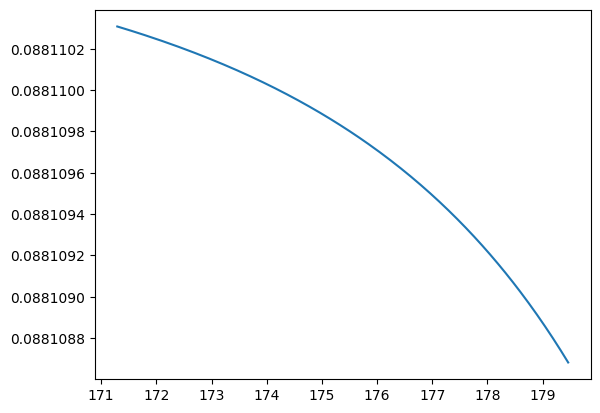

EJinv 0.94428523994925
EJderiv 1.0073973104406946
EJinv diff 1j 2s: 0.23556484156727245
EJinv diff 1 sen: 0.28278108564084165
EJinv diff 2 sen: 0.3799097291285215
n0_star borders 0.0 1.6930681943673154
Diff Rho: 0.02285768221936317
EJinv 0.9466408777305819
EJderiv 1.1491037172884262
EJinv diff 1j 2s: 5.367889738510399
EJinv diff 1 sen: 0.28275499988268865
EJinv diff 2 sen: 0.36321282269289384
n0_star borders 0.0 1.689342721099691
Diff Rho: 0.022859415656928984
EJinv 0.9281572501565717
EJderiv 1.4946428800456601
EJinv diff 1j 2s: 0.37628858501176077
EJinv diff 1 sen: 0.2826160376675189
EJinv diff 2 sen: 0.34158947933517114
n0_star borders 0.0 1.6867168251092166
Diff Rho: 0.022860218543641102
EJinv 0.9112995112888074
EJderiv 0.7016230384701885
EJinv diff 1j 2s: 1.6458490355092465
EJinv diff 1 sen: 0.2829588021385662
EJinv diff 2 sen: 0.326627535193994
n0_star borders 0.0 1.6849227432558065
Diff Rho: 0.02285952876612032
EJinv 0.8979225326474861
EJderiv 0.8344422412567383
EJinv diff 1j 2s:

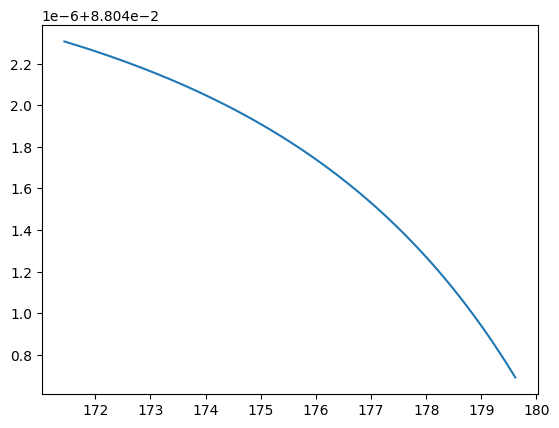

EJinv 0.9511818460845907
EJderiv 1.561938039413917
EJinv diff 1j 2s: 1.5507133316765696
EJinv diff 1 sen: 0.28149069924491765
EJinv diff 2 sen: 0.3931243494959445
n0_star borders 0.0 1.6930495070766631
Diff Rho: 0.020713652782183505
EJinv 0.9528814665841049
EJderiv 0.8977028469946049
EJinv diff 1j 2s: 0.38221691614910935
EJinv diff 1 sen: 0.2812172146983411
EJinv diff 2 sen: 0.3770435624546171
n0_star borders 0.0 1.6896818871658486
Diff Rho: 0.020714470129505964
EJinv 0.9360050999687473
EJderiv 1.2123272718782232
EJinv diff 1j 2s: 0.8273864496197777
EJinv diff 1 sen: 0.2812482061056651
EJinv diff 2 sen: 0.3561075754700617
n0_star borders 0.0 1.687307462710311
Diff Rho: 0.020715119774036957
EJinv 0.9208075391026065
EJderiv 1.4062100013123313
EJinv diff 1j 2s: 0.30101804363310447
EJinv diff 1 sen: 0.2817667781205722
EJinv diff 2 sen: 0.33972791772935856
n0_star borders 0.0 1.6856841556821296
Diff Rho: 0.020714773962457373
EJinv 0.9090155291876658
EJderiv 1.5346171491569294
EJinv diff 1j 

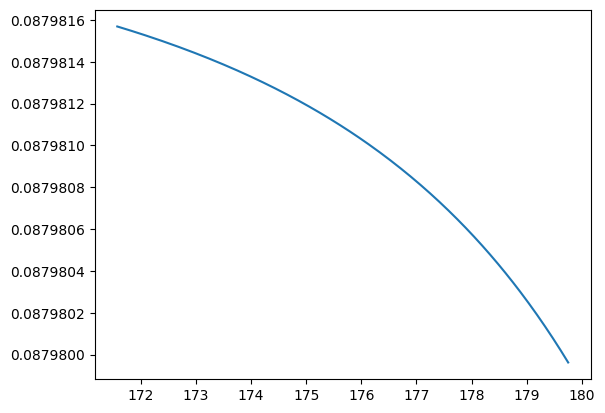

EJinv 0.960447934708236
EJderiv 1.2273224545900234
EJinv diff 1j 2s: 0.2847842850436336
EJinv diff 1 sen: 0.28042885099515646
EJinv diff 2 sen: 0.4294535828494397
n0_star borders 0.0 1.6930217814303496
Diff Rho: 0.01886020931471202
EJinv 0.9615763463410073
EJderiv 0.7260793117796993
EJinv diff 1j 2s: 0.2996893519725624
EJinv diff 1 sen: 0.2803278331363824
EJinv diff 2 sen: 0.44610452606673806
n0_star borders 0.0 1.6899727891921257
Diff Rho: 0.018860277605241293
EJinv 0.9461234418660397
EJderiv 1.0089413354091903
EJinv diff 1j 2s: 0.41117061462324034
EJinv diff 1 sen: 0.2808226547119614
EJinv diff 2 sen: 0.529969510588501
n0_star borders 0.0 1.6878224372486839
Diff Rho: 0.01886076207879116
EJinv 0.9324380934590993
EJderiv 1.186618729392194
EJinv diff 1j 2s: 0.4158514560241114
EJinv diff 1 sen: 0.28054389121080336
EJinv diff 2 sen: 0.8371358557457376
n0_star borders 0.0 1.6863515102782318
Diff Rho: 0.01886071522009158
EJinv 0.921970216195591
EJderiv 1.3058298205727965
EJinv diff 1j 2s: 0

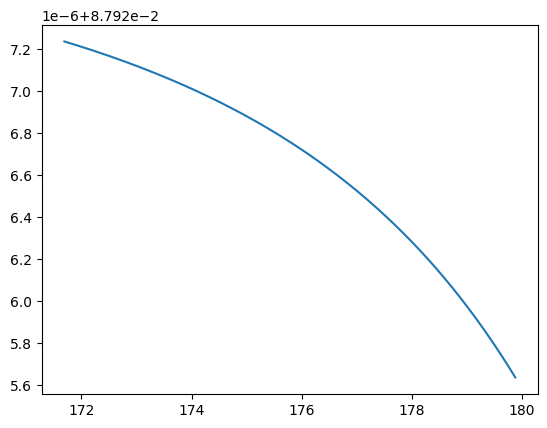

EJinv 0.9708933737547158
EJderiv 1.0097189916666593
EJinv diff 1j 2s: 0.2931133098851718
EJinv diff 1 sen: 0.2786059330050096
EJinv diff 2 sen: 0.4549079629945943
n0_star borders 0.0 1.692986608531224
Diff Rho: 0.01725362604345255
EJinv 0.9719316382046088
EJderiv 0.6481853785298313
EJinv diff 1j 2s: 0.31374563590189153
EJinv diff 1 sen: 0.27841945218802694
EJinv diff 2 sen: 0.4350954918889827
n0_star borders 0.0 1.6902221789814726
Diff Rho: 0.017253077712993368
EJinv 0.9583467504078254
EJderiv 0.8989491828463088
EJinv diff 1j 2s: 0.5445832229383605
EJinv diff 1 sen: 0.2784634901740302
EJinv diff 2 sen: 0.4037704243230678
n0_star borders 0.0 1.688272102602771
Diff Rho: 0.01725342787787328
EJinv 0.9462711713469133
EJderiv 1.0563677880313662
EJinv diff 1j 2s: 7.705200596857161
EJinv diff 1 sen: 0.2791427038137698
EJinv diff 2 sen: 0.38522735809222514
n0_star borders 0.0 1.6869375682638257
Diff Rho: 0.0172536089833841
EJinv 0.9371431806438402
EJderiv 1.161399498442563
EJinv diff 1j 2s: 0.4

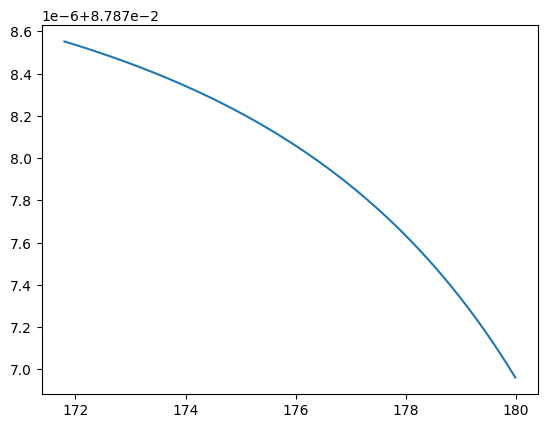

EJinv 0.9796849829672668
EJderiv 0.8328194223869332
EJinv diff 1j 2s: 0.2768246582069159
EJinv diff 1 sen: 0.27819896613321454
EJinv diff 2 sen: 0.3112136844249144
n0_star borders 0.0 1.6929521674065158
Diff Rho: 0.015857408476923195
EJinv 0.9807768721928133
EJderiv 0.6028338592709019
EJinv diff 1j 2s: 0.2676247759546543
EJinv diff 1 sen: 0.2778868311259164
EJinv diff 2 sen: 0.30950600110150833
n0_star borders 0.0 1.6904420393318054
Diff Rho: 0.015856378474813734
EJinv 0.9694906442632422
EJderiv 0.8297686427584381
EJinv diff 1j 2s: 0.3283599502394172
EJinv diff 1 sen: 0.27822447329137734
EJinv diff 2 sen: 0.3081495293851045
n0_star borders 0.0 1.6886709919098752
Diff Rho: 0.015856605714359123
EJinv 0.959587581514075
EJderiv 0.9721090130346965
EJinv diff 1j 2s: 0.2941356200696582
EJinv diff 1 sen: 0.2782532579455213
EJinv diff 2 sen: 0.306973550126952
n0_star borders 0.0 1.687458464642274
Diff Rho: 0.01585695588104292
EJinv 0.9523484726184012
EJderiv 1.0653492321159774
EJinv diff 1j 2s:

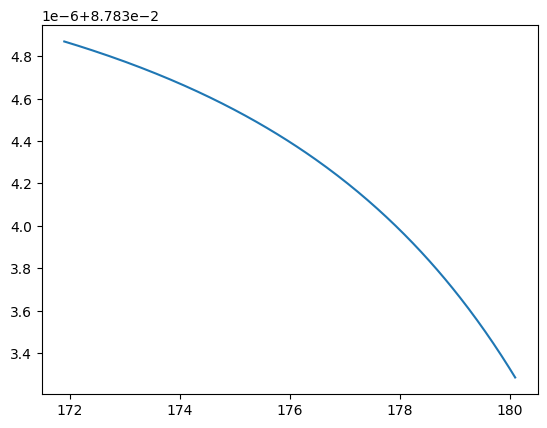

EJinv 0.9883879315320531
EJderiv 0.6674241222197566
EJinv diff 1j 2s: 0.37069535892837246
EJinv diff 1 sen: 0.276850683117926
EJinv diff 2 sen: 0.37206215455409863
n0_star borders 0.0 1.6929159852225086
Diff Rho: 0.014640755451298518
EJinv 0.9891853572735566
EJderiv 1.5549888181282085
EJinv diff 1j 2s: 0.32654035703211615
EJinv diff 1 sen: 0.2767209052299688
EJinv diff 2 sen: 0.37269882645677577
n0_star borders 0.0 1.6906334540526617
Diff Rho: 0.014639380307637305
EJinv 0.9793544677737834
EJderiv 0.761660829543473
EJinv diff 1j 2s: 0.3502695080320366
EJinv diff 1 sen: 0.27679734453631444
EJinv diff 2 sen: 0.3773040238832045
n0_star borders 0.0 1.6890227131504592
Diff Rho: 0.01463952364500434
EJinv 0.9710443950845636
EJderiv 0.8903493215401568
EJinv diff 1j 2s: 0.37984050976724937
EJinv diff 1 sen: 0.2767497634275466
EJinv diff 2 sen: 0.3849625030460448
n0_star borders 0.0 1.6879195361975223
Diff Rho: 0.014640012750536498
EJinv 0.9651657802340196
EJderiv 0.9753179943190275
EJinv diff 1j

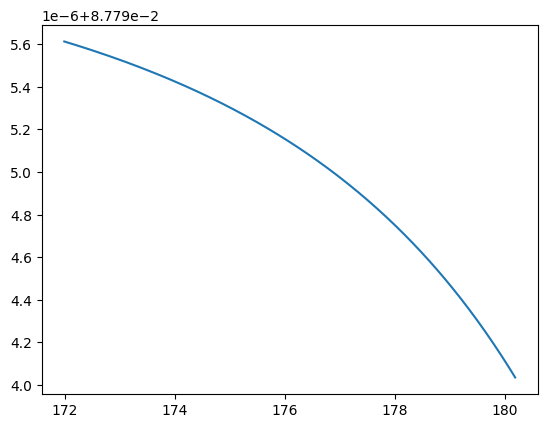

EJinv 0.998510529062811
EJderiv 1.5130178502586205
EJinv diff 1j 2s: 0.3218124494729512
EJinv diff 1 sen: 0.2766863665681956
EJinv diff 2 sen: 0.3977086200839001
n0_star borders 0.0 1.6928800986198376
Diff Rho: 0.013577791546485243
EJinv 0.9989196330033848
EJderiv 1.5058390586058863
EJinv diff 1j 2s: 0.3811376565928229
EJinv diff 1 sen: 0.2765485735195863
EJinv diff 2 sen: 0.3869531667391835
n0_star borders 0.0 1.6908019450022083
Diff Rho: 0.013576157291225037
EJinv 0.9898408472911152
EJderiv 0.6941663594724332
EJinv diff 1j 2s: 0.5382847215576756
EJinv diff 1 sen: 0.27647404388475094
EJinv diff 2 sen: 0.3659269153675646
n0_star borders 0.0 1.6893352127896595
Diff Rho: 0.013576228337397788
EJinv 0.982372368791025
EJderiv 0.8120234275143616
EJinv diff 1j 2s: 0.35129002723091474
EJinv diff 1 sen: 0.2765590294848358
EJinv diff 2 sen: 0.35334559079208266
n0_star borders 0.0 1.6883303461795938
Diff Rho: 0.013576824350412896
EJinv 0.977170499011672
EJderiv 0.8901079442030095
EJinv diff 1j 2s

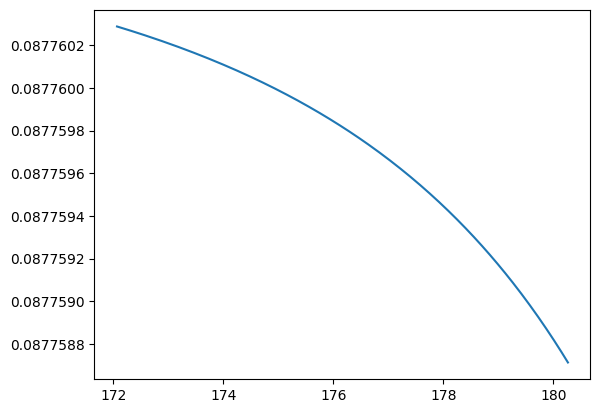

EJinv 1.0084629460750474
EJderiv 1.3670331911894777
EJinv diff 1j 2s: 0.5187977790305603
EJinv diff 1 sen: 0.2764807407180972
EJinv diff 2 sen: 0.3782487640737325
n0_star borders 0.0 1.6928509663788167
Diff Rho: 0.012646912828841913
EJinv 1.00891703153466
EJderiv 1.4543508986596976
EJinv diff 1j 2s: 1.0872279409463854
EJinv diff 1 sen: 0.2762498729989528
EJinv diff 2 sen: 0.3843844438149956
n0_star borders 0.0 1.6909559312634355
Diff Rho: 0.012645087438390849
EJinv 1.0007235463589443
EJderiv 0.6265506487574157
EJinv diff 1j 2s: 0.34337823040868093
EJinv diff 1 sen: 0.2761826069958704
EJinv diff 2 sen: 0.404536161214043
n0_star borders 0.0 1.6896181882539478
Diff Rho: 0.012645083471662358
EJinv 0.9939984481156955
EJderiv 0.7354925808982671
EJinv diff 1j 2s: 0.40615368088877934
EJinv diff 1 sen: 0.27617164872620387
EJinv diff 2 sen: 0.43646440696176486
n0_star borders 0.0 1.6887013577958654
Diff Rho: 0.012645739505338142
EJinv 0.9893323708673873
EJderiv 0.8079069539895727
EJinv diff 1j 2

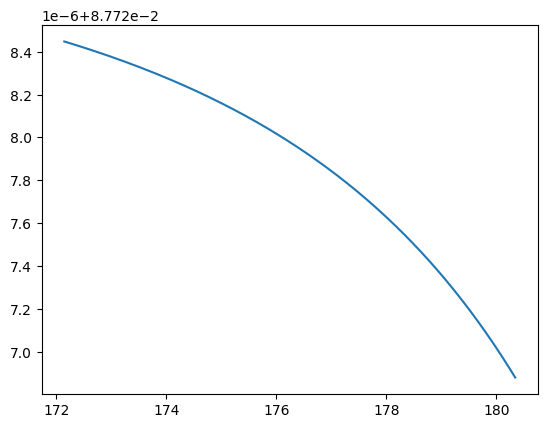

EJinv 1.0166591655687587
EJderiv 1.2250723402999597
EJinv diff 1j 2s: 0.3102141836373034
EJinv diff 1 sen: 0.2756902185737792
EJinv diff 2 sen: 11.491663417016024
n0_star borders 0.0 1.6928161492924536
Diff Rho: 0.011829497965278333
EJinv 1.0172356044982267
EJderiv 1.396544641841615
EJinv diff 1j 2s: 0.3021291521404066
EJinv diff 1 sen: 0.2754806830978859
EJinv diff 2 sen: 0.9900542837199318
n0_star borders 0.0 1.6910861977736937
Diff Rho: 0.011827553048156287
EJinv 1.0099156384613333
EJderiv 1.5557481586737936
EJinv diff 1j 2s: 0.36061071243030035
EJinv diff 1 sen: 0.27541947841718334
EJinv diff 2 sen: 0.5588774838653722
n0_star borders 0.0 1.6898648597417403
Diff Rho: 0.011827516792326711
EJinv 1.00393363442844
EJderiv 0.6573541083993177
EJinv diff 1j 2s: 0.47297419983431666
EJinv diff 1 sen: 0.27561503542116506
EJinv diff 2 sen: 0.5085384712071915
n0_star borders 0.0 1.6890276070946129
Diff Rho: 0.011828219997863914
EJinv 0.999822812610537
EJderiv 0.725361216132228
EJinv diff 1j 2s:

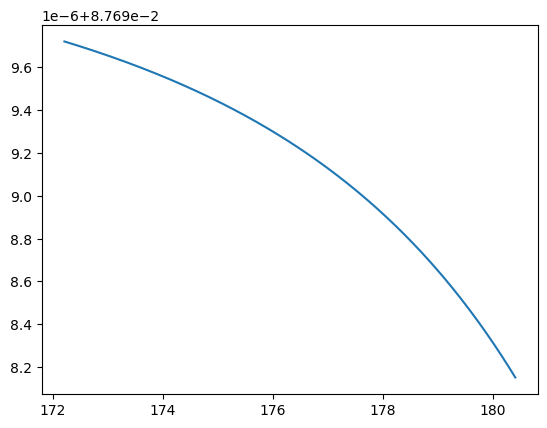

EJinv 1.0232175233136183
EJderiv 1.0815535768194309
EJinv diff 1j 2s: 0.4203085783620318
EJinv diff 1 sen: 0.274591028854222
EJinv diff 2 sen: 0.6432843137071008
n0_star borders 0.0 1.6927844401657013
Diff Rho: 0.011109869599642493
EJinv 1.0238566133009543
EJderiv 1.3285047724059496
EJinv diff 1j 2s: 0.2909923910003513
EJinv diff 1 sen: 0.27454911439727236
EJinv diff 2 sen: 0.5942798072581369
n0_star borders 0.0 1.6912033990904818
Diff Rho: 0.011107869297768351
EJinv 1.0173373525821323
EJderiv 1.4767785815521393
EJinv diff 1j 2s: 0.3615385169784151
EJinv diff 1 sen: 0.2744929850767476
EJinv diff 2 sen: 0.5186580058895456
n0_star borders 0.0 1.6900870747498022
Diff Rho: 0.011107814159796617
EJinv 1.0120388409279166
EJderiv 1.572419288076503
EJinv diff 1j 2s: 0.41579187175960397
EJinv diff 1 sen: 0.27450461358983935
EJinv diff 2 sen: 0.47300832199171944
n0_star borders 0.0 1.6893216369547823
Diff Rho: 0.011108563935112692
EJinv 1.0084431243616836
EJderiv 0.6372012915373944
EJinv diff 1j 

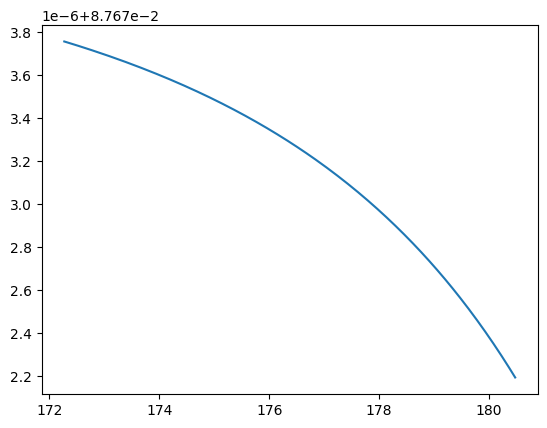

EJinv 1.028658967590637
EJderiv 0.9348239262806146
EJinv diff 1j 2s: 0.3154183996150665
EJinv diff 1 sen: 0.2751547376663882
EJinv diff 2 sen: 1.8311942010670612
n0_star borders 0.0 1.6927533479594046
Diff Rho: 0.010474637079045217
EJinv 1.029251042837643
EJderiv 1.2481916722872484
EJinv diff 1j 2s: 0.37365384022979165
EJinv diff 1 sen: 0.27498128494461715
EJinv diff 2 sen: 5.16927611532917
n0_star borders 0.0 1.6913068803828175
Diff Rho: 0.01047261292501489
EJinv 1.0233483384483402
EJderiv 1.3858305295747186
EJinv diff 1j 2s: 0.2895302995182055
EJinv diff 1 sen: 0.2750819841556727
EJinv diff 2 sen: 0.7552707233040299
n0_star borders 0.0 1.6902854960135896
Diff Rho: 0.01047256853242646
EJinv 1.0185810584754178
EJderiv 1.4755953792646892
EJinv diff 1j 2s: 0.365123122143731
EJinv diff 1 sen: 0.27509746297798177
EJinv diff 2 sen: 0.5533069385441225
n0_star borders 0.0 1.6895850298095612
Diff Rho: 0.010473370334791156
EJinv 1.0153730830462535
EJderiv 1.537293230349917
EJinv diff 1j 2s: 0.6

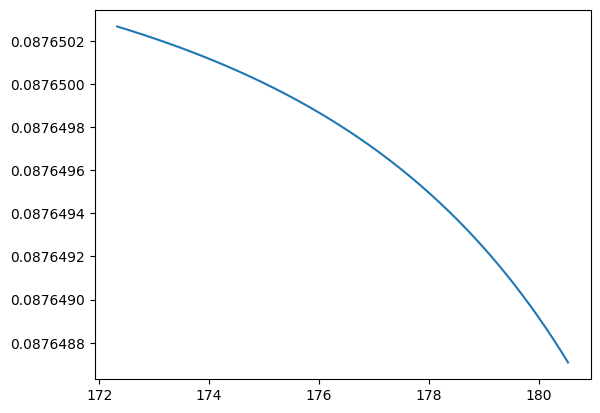

EJinv 1.0335692105609295
EJderiv 0.7949360215203001
EJinv diff 1j 2s: 0.3644364197952231
EJinv diff 1 sen: 0.2743281071930166
EJinv diff 2 sen: 0.5808673222180636
n0_star borders 0.0 1.6927248815128397
Diff Rho: 0.00991283360137521
EJinv 1.0340720740885392
EJderiv 1.1659492701351724
EJinv diff 1j 2s: 0.31548274757187833
EJinv diff 1 sen: 0.2741700134986993
EJinv diff 2 sen: 0.6597036002851879
n0_star borders 0.0 1.6913998816774933
Diff Rho: 0.009910789978348017
EJinv 1.0286229951872712
EJderiv 1.291673743231172
EJinv diff 1j 2s: 0.27396361145287657
EJinv diff 1 sen: 0.274123651548144
EJinv diff 2 sen: 1.9468316347180488
n0_star borders 0.0 1.6904641974722723
Diff Rho: 0.009910734198874387
EJinv 1.0242174432479747
EJderiv 1.3735852540983728
EJinv diff 1j 2s: 0.3640393513593451
EJinv diff 1 sen: 0.27400543119681475
EJinv diff 2 sen: 0.879697329264524
n0_star borders 0.0 1.689822393593238
Diff Rho: 0.009911563373566716
EJinv 1.0212507922933287
EJderiv 1.4299164315834787
EJinv diff 1j 2s: 

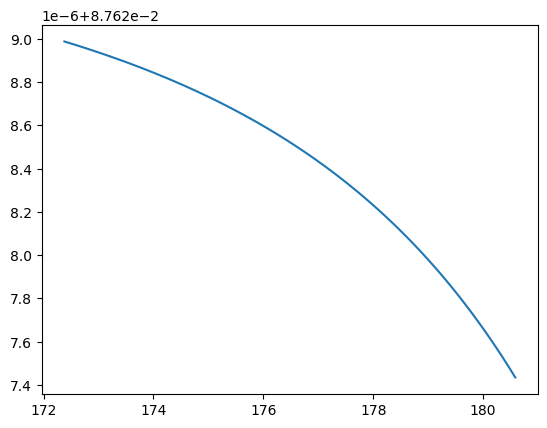

EJinv 1.0380647051612626
EJderiv 0.6668786937527784
EJinv diff 1j 2s: 0.32066897997186794
EJinv diff 1 sen: 0.2742654103729308
EJinv diff 2 sen: 8.924716340316692
n0_star borders 0.0 1.6927004619678154
Diff Rho: 0.009414647769490374
EJinv 1.0384925525304607
EJderiv 1.090114460804557
EJinv diff 1j 2s: 0.3612997295118751
EJinv diff 1 sen: 0.27412090573164116
EJinv diff 2 sen: 1.0906940629149884
n0_star borders 0.0 1.691485423877207
Diff Rho: 0.009412626962812722
EJinv 1.033448086005901
EJderiv 1.2048966568487458
EJinv diff 1j 2s: 0.3084522404091059
EJinv diff 1 sen: 0.27424009453870496
EJinv diff 2 sen: 0.6607980804866467
n0_star borders 0.0 1.6906273088583177
Diff Rho: 0.009412583147728608
EJinv 1.0293571232998942
EJderiv 1.2793210659851866
EJinv diff 1j 2s: 1.1720310416203983
EJinv diff 1 sen: 0.27413207537659373
EJinv diff 2 sen: 0.56127678323417
n0_star borders 0.0 1.6900385954366808
Diff Rho: 0.009413422972847033
EJinv 1.0265813227385345
EJderiv 1.3301143316232924
EJinv diff 1j 2s: 

In [5]:
# GE basic
#mwc_GE_J = objects['mwc_GE_J']
#mwc_GE_W = objects['mwc_GE_W']
mwc_GE_J = objects['mwc_Rho_J']
mwc_GE_W = objects['mwc_Rho_W']

(mwc_GE_J,mwc_GE_W,mwc_GE_Wstar,mwc_GE_sep,mwc_GE_n0,mwc_GE_n1)=mwc_GE.J(None,None,1)

objects['mwc_GE_J'] = mwc_GE_J
objects['mwc_GE_W'] = mwc_GE_W
 
with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

In [6]:
from Multiworker_Contract_hire_Rho import MultiworkerContract
mwc_Rho=MultiworkerContract(p,cc.js)

In [ ]:
mwc_Rho_J = objects['mwc_Rho_J']
mwc_Rho_W = objects['mwc_Rho_W']

profiler = cProfile.Profile()
profiler.enable()
(mwc_Rho_J,mwc_Rho_W,mwc_Rho_Rho,mwc_Rho_Wstar,mwc_Rho_pc,mwc_Rho_n0,mwc_Rho_n1)=mwc_Rho.J()
profiler.disable()
# Print profiling results
stats = pstats.Stats(profiler).sort_stats(pstats.SortKey.TIME)
#stats.print_stats()

objects['mwc_Rho_J'] = mwc_Rho_J
objects['mwc_Rho_W'] = mwc_Rho_W
with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

In [ ]:
if results is None:
    mwc_Rho_s_J = objects['mwc_Rho_s_J']
    mwc_Rho_s_W = objects['mwc_Rho_s_W']
else:
    mwc_Rho_s_J = results['J']
    mwc_Rho_s_W = results['W']

(mwc_Rho_s_J,mwc_Rho_s_W,mwc_Rho_s_Rho,mwc_Rho_s_Wstar,mwc_Rho_s_sep,mwc_Rho_s_n0,mwc_Rho_s_n1)=mwc_Rho.J_sep_dir(mwc_Rho_J,mwc_Rho_W)

objects['mwc_Rho_s_J'] = mwc_Rho_s_J
objects['mwc_Rho_s_W'] = mwc_Rho_s_W
with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

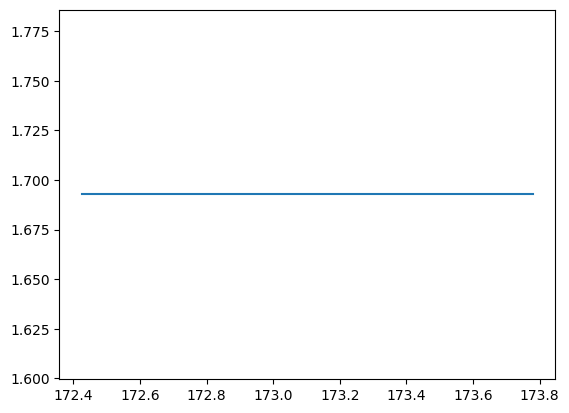

In [6]:
prod = p.z_0-0
j=0
s=0
#plt.plot(mwc_W[p.z_0-1,0,1,:,1],mwc_J[p.z_0-1,0,1,:])
#plt.plot(mwc.w_grid,mwc_n0[p.z_0,0,0,:])
#plt.plot(mwc.w_grid,mwc_W[p.z_0,0,1,:,1])
#plt.plot(mwc_W[p.z_0,0,1,:,1],mwc_n0[p.z_0,0,1,:])
#plt.plot(mwc_W[p.z_0-1,1,1,:,1],mwc_n0[p.z_0-1,1,1,:])
#plt.plot(mwc_Rho_W[p.z_0,0,0,:,5,1],mwc_Rho_n0[p.z_0,0,0,:,5])
plt.plot(mwc_GE_W[prod,j,s,:,0,1],mwc_GE_n0[prod,j,s,:,0])
#plt.plot(mwc_Rho_s_W[prod,j,s,:,0,1],mwc_Rho_s_n0[prod,j,s,:,0])


#Something is very wrong here, for some reason, when the seniors are the "cheapest" (lowest w_grid), the firm doesn't hire???
#Also the top part is still...kinda weird
#Also no hiring at 1 junior, but hiring at 1 senior???

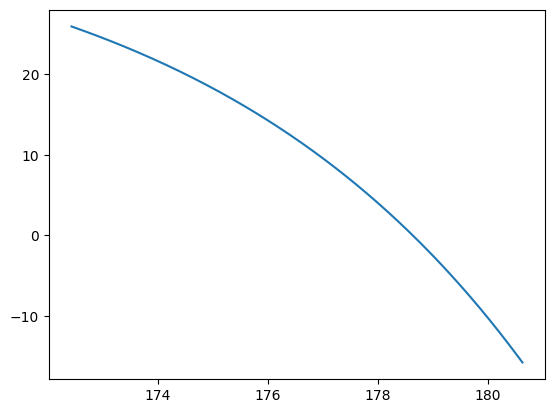

In [9]:
prod = p.z_0-1
j=0
s=1
#plt.plot(mwc_W[p.z_0,j,s,:,1],mwc_J[p.z_0,j,s,:])
#plt.plot(mwc_hmq_W[p.z_0,j,s,:,0,1],mwc_hmq_J[p.z_0,j,s,:,0]-mwc_hmq_J[p.z_0,j-1,s,:,0])
#plt.plot(mwc_Rho_W[p.z_0,j,s,:,0,1],mwc_Rho_J[p.z_0,j,s,:,0]-mwc_Rho_J[p.z_0,j-1,s,:,0])
plt.plot(mwc_GE_W[prod,j,s,:,0,1],mwc_GE_J[prod,j,s,:,0])
#plt.plot(mwc_Rho_s_W[prod,j,s,:,0,1],mwc_Rho_s_J[prod,j,s,:,0])

#plt.plot(mwc_Rho.w_grid,mwc_Rho_J[prod,j,s,:,0])
#plt.plot(mwc_hmq_W[prod,j,s,:,0,1],mwc_hmq_J[prod,j,s,:,0])
#plt.plot(mwc_Rho_W[p.z_0,j,s,:,0,1],mwc_Rho_n1[p.z_0,j,s,:,0])

In [ ]:
from Multiworker_Contract_all import MultiworkerContract
K=2 #number of tenure levels
mwc=MultiworkerContract(p,cc.js)
(mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n0,mwc_n1)=mwc.J()

In [ ]:
# GE separations
if results is None:
    mwc_GE_s_J = objects['mwc_GE_J']
    mwc_GE_s_W = objects['mwc_GE_W']
else:
    mwc_GE_s_J = results['Ji']
    mwc_GE_s_W = results['W1i']

(mwc_GE_s_J,mwc_GE_s_W,mwc_GE_s_Wstar,mwc_GE_s_sep,mwc_GE_s_n0,mwc_GE_s_n1)=mwc_GE.J_sep_dir(mwc_GE_J,mwc_GE_W,1)

objects['mwc_GE_s_J'] = mwc_GE_s_J
objects['mwc_GE_s_W'] = mwc_GE_s_W
 
with open('my_objects.pkl', 'wb') as file:
    pickle.dump(objects, file)

# Plots

In [15]:
output_dir = 'Plots'
if not os.path.exists(output_dir):
         os.makedirs(output_dir)

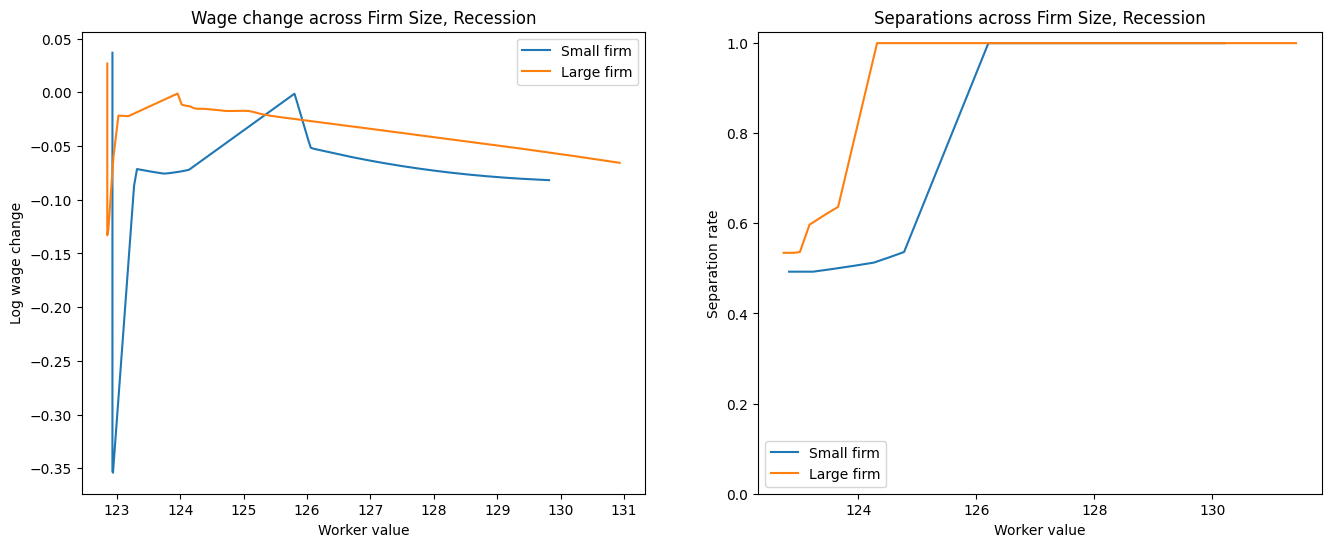

In [16]:
        #THIS IS SOMEHOW THE OPPOSITE??? In firms with many juniors wage drops are larger?? Why?? I guess they don't care for that many seniors?
        #But then why would it equialize afterwards... AHHH BECAUSE ALL THE JUNIORS ARE ALREADY FIRED
        #Now 1,3 places much higher weight on its expensive seniors hencewhy wage drop not that large...? WAGE DROP BOUNCES UP A BIT WHEN THEY START FIRING
        #Still can't understand why 1,1 goes for full firing earlier tho... Also at the same time that complete firing happens, wage drops amplify... guess that makes sense tho
        save=1
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1) 
        # Plot the data
        #plt.plot(mwc_Rho_s_W[0, 1, 1 ,:, 5, 1], mwc_Rho_s_Wstar[0, 1, 1 ,:, 5]-mwc_Rho_s_W[0, 1, 1 ,:, 5, 1], label='Small firm')
        plt.plot(mwc_Rho_s_Wstar[0, 1, 1 ,:, 5], np.log(np.interp(mwc_Rho_s_Wstar[0, 1, 1 ,:, 5],mwc_Rho_s_W[0,1,1,:,5,1],mwc_Rho.w_grid))-np.log(mwc_Rho.w_grid), label='Small firm')
        plt.plot(mwc_Rho_s_Wstar[0, 1, 3 ,:, 5], np.log(np.interp(mwc_Rho_s_Wstar[0, 1, 3 ,:, 5],mwc_Rho_s_W[0,1,3,:,5,1],mwc_Rho.w_grid))-np.log(mwc_Rho.w_grid), label='Large firm')

        #plt.plot(mwc_Rho_s_W[0, 1, 3 ,:, 5, 1], mwc_Rho_s_Wstar[0, 1, 3 ,:, 5]-mwc_Rho_s_W[0, 1, 3 ,:, 5, 1], label='Larger firm')
        #plt.plot(baseline_W[0, 3, 1 ,:, 5, 1], baseline_Wstar[0, 3, 1 ,:, 5]-baseline_W[0, 3, 1 ,:, 5, 1], label='Larger firm wage')
        #if mwc_s_W is not None:
        #    plt.plot(mwc_s_W[p.z_0-1, 0, 1,:, 1], mwc_s_Wstar[p.z_0-1, 0, 1, :]-mwc_s_W[p.z_0-1, 0, 1,:, 1], label='DRS with separations')
        #if mwc_s_dir_W is not None:
        #    plt.plot(mwc_s_dir_W[p.z_0-1, 0, 1,:, 1], mwc_s_dir_Wstar[p.z_0-1, 0, 1, :]-mwc_s_dir_W[p.z_0-1, 0, 1,:, 1], label='DRS with direct separations')
        plt.legend()
        # Add titles and labels
        plt.title('Wage change across Firm Size, Recession')
        plt.xlabel('Worker value')
        plt.ylabel('Log wage change')

        # Secone subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot

        plt.plot(mwc_Rho_s_W[0, 1, 1, :, 0 ,1], mwc_Rho_s_sep[0, 1, 1, :, 0], label='Small firm')
        plt.plot(mwc_Rho_s_W[0, 1, 3, :, 0 ,1], mwc_Rho_s_sep[0, 1, 3, :, 0], label='Large firm')

        plt.legend()
        # Add titles and labels
        plt.title('Separations across Firm Size, Recession')
        plt.xlabel('Worker value')
        plt.ylabel('Separation rate')
        plt.ylim(ymin=0)
        if save==1:
          plt.savefig(os.path.join(output_dir,'Log wage cuts and Separations Across Size.png'), bbox_inches='tight')  # Save as PNG

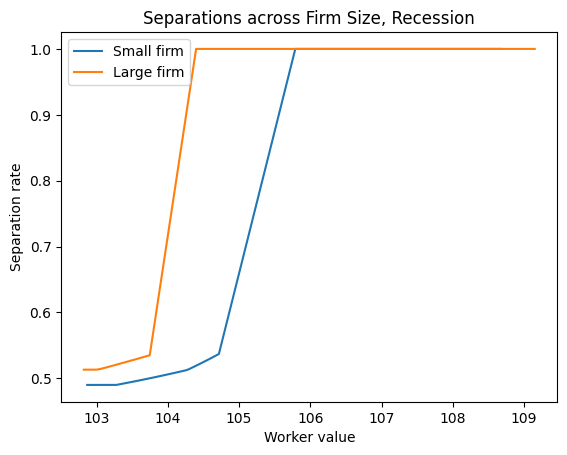

In [28]:

if save==1:
        plt.savefig(os.path.join(output_dir,'Separations Across Size.png'), bbox_inches='tight')  # Save as PNG

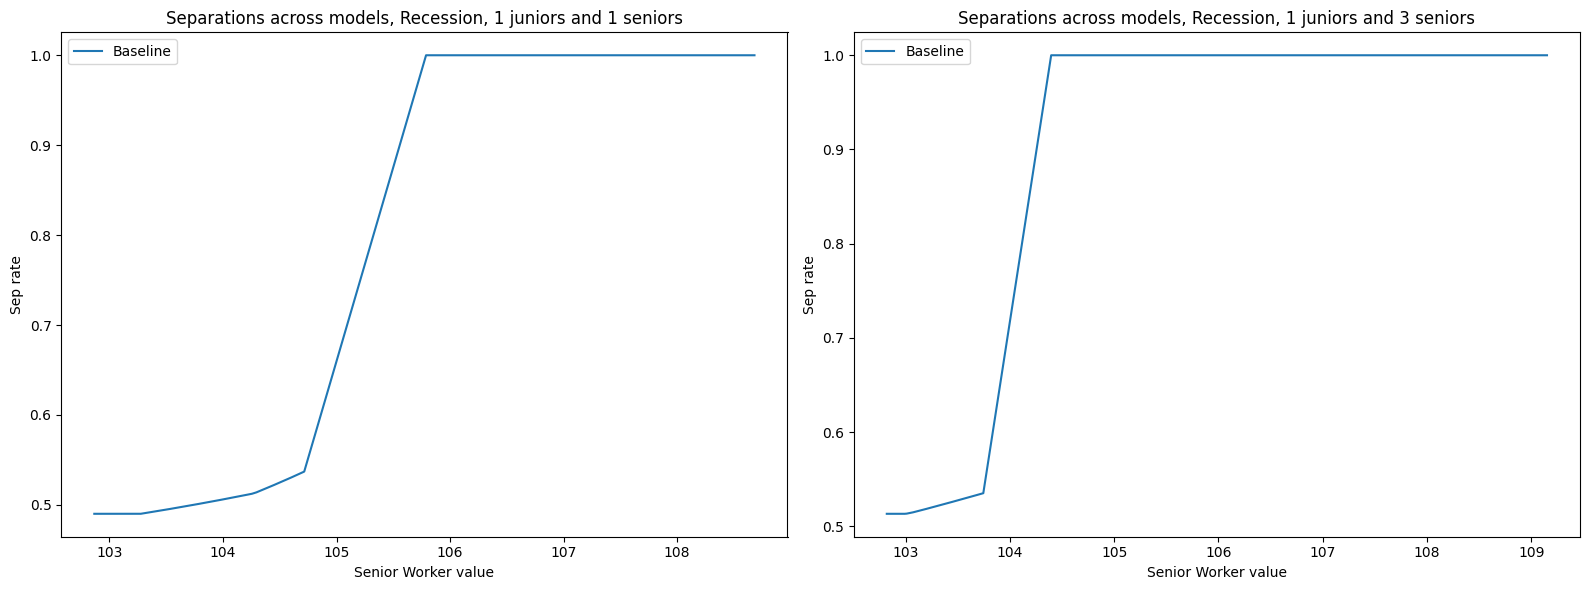

In [14]:
plot_sep(0,0,    1,1,    1,3,    0,  0,0,    0)

In [11]:
def plot_sep(prod1,prod2,jun1,sen1,jun2,sen2,qual,minwage=0,hiresub=0, save=0):       
 
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        prod=prod1
        jun=jun1
        sen=sen1

        #plt.plot(mwc_GE_s_W[prod1, jun, sen, :, qual ,1], mwc_GE_s_sep[prod1, jun, sen, :, qual], label='Baseline')
        plt.plot(mwc_Rho_s_W[prod1, jun, sen, :, qual ,1], mwc_Rho_s_sep[prod1, jun, sen, :, qual], label='Baseline')

     

        if prod1 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod1 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()
        # Second subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        prod=prod2
        jun=jun2
        sen=sen2

        #plt.plot(mwc_GE_s_W[prod2, jun, sen, :, qual ,1], mwc_GE_s_sep[prod2, jun, sen, :, qual], label='Baseline')
        plt.plot(mwc_Rho_s_W[prod2, jun, sen, :, qual ,1], mwc_Rho_s_sep[prod2, jun, sen, :, qual], label='Baseline')
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod2 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'Separations main 2.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [7]:
names = [ 'DRS HMQ', 'DRS HMQ via RHO', 'HMQ']

In [ ]:
plts.CRSvsDRSvalue(names,cc_W,cc_J,mwc_hmq_W[...,0,:],mwc_Rho_J[...,0],mwc_Rho_W[...,0,:],mwc_Rho_J[...,0],None,None,0)

In [9]:
def plot_GE(prod1,prod2,jun1,sen1,jun2,sen2,qual,minwage=0,hiresub=0, save=0):       
 
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        prod=prod1
        jun=jun1
        sen=sen1
       
        plt.plot(mwc_GE_W[prod1, jun, sen, :, qual ,1], mwc_GE_J[prod1, jun, sen, :, qual], label='Baseline')
        if mwc_GE_s_W is not None:
          plt.plot(mwc_GE_s_W[prod1, jun, sen, :, qual ,1], mwc_GE_s_J[prod1, jun, sen, :, qual], label='With separations')


     

        if prod1 == 2:
          plt.title(f'Firm Value, Boom, {jun} juniors and {sen} seniors')
        elif prod1 == 0:
          plt.title(f'Firm Value, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Firm Value, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Firm Value')
        plt.legend()
        # Second subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        prod=prod2
        jun=jun2
        sen=sen2
        plt.plot(mwc_GE_W[prod2, jun, sen, :, qual ,1], mwc_GE_J[prod2, jun, sen, :, qual], label='Baseline')
        if mwc_GE_s_W is not None:
          plt.plot(mwc_GE_s_W[prod2, jun, sen, :, qual ,1], mwc_GE_s_J[prod2, jun, sen, :, qual], label='With separations')

       
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Firm Value, Boom, {jun} juniors and {sen} seniors')
        elif prod2 == 0:
          plt.title(f'Firm Value, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Firm Value, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Firm Value')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'General Equilibrium Value Function.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [ ]:
plot_GE(2,0,    1,2,    1,1,    0,  0,0,    0)

In [6]:
baseline_sep = objects['baseline_sep']
baseline_W = objects['baseline_W']
baseline_Wstar = objects['baseline_Wstar']


noHMQ_sep = objects['noHMQ_sep']
noHMQ_W = objects['noHMQ_W']
noHMQ_Wstar = objects['noHMQ_Wstar']
nohire_sep = objects['nohire_sep']
nohire_W = objects['nohire_W']
nohire_Wstar = objects['nohire_W']
hiresub_sep = objects['hiresub_sep']
hiresub_W = objects['hiresub_W']
hiresub_Wstar = objects['hiresub_Wstar']

In [7]:
import os
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [8]:
def plott(prod1,prod2,jun1,sen1,jun2,sen2,qual,minwage=0,hiresub=0, save=0):       
 
        plt.figure(figsize=(16, 6))  # Width=16 inches, Height=6 inches

        # First subplot
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
        prod=prod1
        jun=jun1
        sen=sen1
        if baseline_W is not None:        
            plt.plot(baseline_W[prod1, jun, sen, 5:50, qual ,1], baseline_sep[prod1, jun, sen, 5:50, qual], label='Baseline')
        plt.plot(mwc_hmq_sd_W[prod1, jun, sen, 5:50, qual ,1], mwc_hmq_sd_sep[prod1, jun, sen, 5:50, qual], label='New baseline')
        if nohire_W is not None:        
         plt.plot(nohire_W[prod1, jun, sen, 5:50, qual ,1], nohire_sep[prod1, jun, sen, 5:50, qual], label='CRS') #Not true CRS but still
        #if noHMQ_W is not None:        
        # plt.plot(noHMQ_W[prod1, jun, sen, 5:50, qual, 1], noHMQ_sep[prod1, jun, sen, 5:50, qual], label='No match heterog')
        #if minwage_W is not None: 
        # if minwage ==1: 
        #  plt.plot(minwage_W[prod1, jun, sen, 5:50, qual, 1], minwage_sep[prod1, jun, sen, 5:50, qual], label='Min wage')
        if hiresub ==1 :
          plt.plot(hiresub_W[prod1, jun, sen, 5:50, qual, 1], hiresub_sep[prod1, jun, sen, 5:50, qual], label='Hiring subsidy')

     

        if prod1 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod1 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()
        # Second subplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
        prod=prod2
        jun=jun2
        sen=sen2
        if baseline_W is not None:        
            plt.plot(baseline_W[prod2, jun, sen, 5:50, qual, 1], baseline_sep[prod2, jun, sen, 5:50, qual], label='Baseline')
        plt.plot(mwc_hmq_sd_W[prod2, jun, sen, 5:50, qual ,1], mwc_hmq_sd_sep[prod2, jun, sen, 5:50, qual], label='New baseline')
        if nohire_W is not None:        
         plt.plot(nohire_W[prod2, jun, sen, 5:50, qual, 1], nohire_sep[prod2, jun, sen, 5:50, qual], label='CRS')  
        #if noHMQ_W is not None:        
        # plt.plot(noHMQ_W[prod2, jun, sen, 5:50, qual, 1], noHMQ_sep[prod2, jun, sen, 5:50, qual], label='No match heterog')     
        #if minwage_W is not None:
        # if minwage == 1:  
        #  plt.plot(minwage_W[prod2, jun, sen, 5:50, qual, 1], minwage_sep[prod2, jun, sen, 5:50, qual], label='Min wage')
        if hiresub ==1 :
          plt.plot(hiresub_W[prod2, jun, sen, 5:50, qual, 1], hiresub_sep[prod2, jun, sen, 5:50, qual], label='Hiring subsidy')            
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Separations across models, Boom, {jun} juniors and {sen} seniors')
        elif prod2 == 0:
          plt.title(f'Separations across models, Recession, {jun} juniors and {sen} seniors')
        else:
          plt.title(f'Separations across models, {prod} productivity, {jun} juniors and {sen} seniors')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'Separations main 2.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [ ]:
plott(0,0,  1,3,    2,2,    5,0,0,save=0)

In [ ]:
plott(0,0,  1,1,    1,3,    5, 0,0, save=0)

In [ ]:
        prod2=0
        save=1
        qual = 5
        if baseline_W is not None:        
            plt.plot(baseline_W[prod2, 1, 1, 5:, qual, 1], baseline_sep[prod2, 1, 1, 5:, qual], label='Small firm')
        if baseline_W is not None:        
            plt.plot(baseline_W[prod2, 1, 3, 5:, qual, 1], baseline_sep[prod2, 1, 3, 5:, qual], label='Larger firm')  
        #if baseline_W is not None:        
        
        #plt.plot(baseline_W[prod2, 1, 3, 5:, qual, 1], baseline_sep[prod2, 1, 3, 5:, qual], label='Many seniors')     
         
        # Adjust layout to prevent overlap
        if prod2 == 2:
          plt.title(f'Separations across size, Boom')
        elif prod2 == 0:
          plt.title(f'Separations across size, Recession')
        else:
          plt.title(f'Separations across size, {prod} productivity')
        plt.xlabel('Senior Worker value')
        plt.ylabel('Sep rate')
        plt.legend()       
        
        plt.tight_layout()

        if save==1:
          plt.savefig(os.path.join(output_dir,'Separations across size new.png'), bbox_inches='tight')  # Save as PNG

        # Show the plot (optional)
        plt.show()

In [ ]:
#This is no DRS/hiring. Even less firing than no HMQ

plts.sep(0,p.z_0,1,3,1,3,None,None,noHMQ_W[...,1,:],noHMQ_sep[...,1])

In [ ]:
plts.CRSvsDRSpolicy(cc_W,cc_Wstar,baseline_W[...,0,:],baseline_Wstar[...,0],nohire_W[...,0,:],baseline_Wstar[...,0],None,None,0)

In [ ]:
plts.CRSvsDRSdirect(cc_J,mwc_J,0)

In [ ]:
plts.CRSvsDRSsurplus(cc_J,cc_W,mwc_J,mwc_W,0)

In [ ]:
import matplotlib.pyplot as plt
import os
# Create a directory to save plots
output_dir = 'Plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
            #something like: sep_star = interp(0,foc_sep,sep_grid) + extra conditions
            #need derivatives of future expectations!
            # for that, I interpolate onto rho_star,n0_star, and one of n1_s/q_s. If I'm looking for derivative wrt size, I interpolate onto q_s and THEN take the difference between two discrete values
            #n1_s[iz,in0,in1,iv,iq,s] = (N_grid[in0]*(1-sep_grid[s])+N_grid1[in1]) * pc_temp[iz,in0,in1,iv] #Gives me sep for every damn value hell yeah
            #n1_s_ceil = np.ceil(np.interp( n1_s, N_grid1, range(self.p.num_n))).astype(int)
            #n1_s_floor = np.floor(np.interp( n1_s, N_grid1, range(self.p.num_n))).astype(int)
            #J_n1[iz,...,s,in11] = RegularGridInterpolator((N_grid, rho_grid, Q_grid), EJpi[iz, :, in11, ...], bounds_error=False, fill_value=None) ((n0_star[iz, ...], rho_star[iz, ...], q_s[iz, ...,s]))
            #J_fut_deriv_n[...,s] = (J_n1[...,s,n1_s_ceil[...,s]] - J_n1[...,s,n1_s_floor[...,s]] ) / (N_grid1[n1_s_ceil[...,s]] - N_grid1[n1_s_floor[...,s]]) #This may need a proper loop
            # Boundary check: first_bound = (n1_s_ceil==0), last_bound = (N_grid1[n1_s_floor]==n_bar)
            #J_fut_deriv_n[first_bound] = (J_n1[first_bound,1] - J_n1[first_bound,0] ) / (N_grid1[1] - N_grid1[0])
            #J_fut_deriv_n[last_bound] = (J_n1[last_bound,-1] - J_n1[last_bound,-2] ) / (N_grid1[-1] - N_grid1[-2])
 
            #q_s = (N_grid[self.grid[1]] * (self.p.q_0 - np.max(sep_grid[s]-( 1- self.p.q_0),0))+Q_grid[self.grid[4]]*N_grid1[self.grid[2]]) / (N_grid[self.grid[1]]*(1-sep_grid[s])+N_grid1[self.grid[2]])
            #J_q[iz,...,s,iqq] = RegularGridInterpolator((N_grid, N_grid1, rho_grid), EJpi[iz, ..., iqq], bounds_error=False, fill_value=None) ((n0_star[iz, ...], n1_s[iz,...,s], rho_star[iz, ...]))
            #J_fut_deriv_q[...,s] = (J_q[...,s,q_s_ceil[...,s]] - J_n1  [...,s,q_s_floor[...,s]] ) / (Q_grid[q_s_ceil[...,s]] - Q_grid[q_s_floor[...,s]]) #This may need a proper loop
            # Boundary check: first_bound = (q_s_ceil==0), last_bound = (Q_grid[q_s_floor]=1.0)
            #J_fut_deriv_q[first_bound] = (J_q[first_bound,1] - J_q[first_bound,0] ) / (Q_grid1[1] - Q_grid1[0])
            #J_fut_deriv_q[last_bound] = (J_q[last_bound,-1] - J_q[last_bound,-2] ) / (Q_grid1[-1] - Q_grid1[-2])
            #q_deriv_s = N_grid[grid[1]] * q_s / (N_grid1[grid[2]]+(1-sep_grid[s])*N_grid[grid[1]]) #Probably need to loop over s. Not efficient, but simpler than redoing the whole self.grid thing
            #worker_fut_value = interp ( rho_star,rho_grid,re+EW1i)                    #This is because we don't yet have the worker future value yet. OR just use EW1_star and re_star??? a little risky but possible.
            #Could be a good start
            #foc_sep[...,s] = - J_fut_deriv[...,s] * pc_temp + J_fut_deriv_q * q_deriv_s - (re+EW1i - EUi) / self.pref.inv_utility_1d(self.v_0-self.p.beta*(s_grid[s] * EUi + (1-s_grid[s]) * (EW1_star + re_star)
            # sep_neg = np.all (foc <= 0, axis = -1)
            # sep_max = np.all (foc > 0, axis = -1)
            # sep_star[sep_neg] = 0
            # sep_star[sep_max] = 1.0 #OH SHIT WHAT IF THE Q IS ALREADY AT ITS MAX? I think this should account for it, no?
            #sep_star = interp_multidim(0,-impose_decreasing(foc_sep),sep_grid) 